In [ ]:
#Install the required libraries as below
# !pip install python-cricket-scraper
# import os

# # Set the GEVENT_SUPPORT environment variable
# os.environ["GEVENT_SUPPORT"] = "True"

In [ ]:
# https://www.espncricinfo.com/series/aus-in-ind-2017-18-1116552/india-vs-australia-1st-odi-1119496/full-scorecard
import pandas as pd
url = 'https://www.espncricinfo.com/series/aus-in-ind-2017-18-1116552/india-vs-australia-1st-odi-1119496/full-scorecard'

all_tables = pd.read_html(url)
len(all_tables)

In [ ]:
all_tables[2].head()

In [ ]:
def convert_to_int(string):
    if pd.isna(string):
        return 0
    elif string == '-':
        return 0
    else:
        return float(string)

# Define a function to extract the numbers from the string
def extract_numbers(string):
  """Extracts all the numbers from a string."""
  numbers = []
  for char in string:
    if char.isdigit():
      numbers.append(int(char))
  return numbers

def Process_Batting_Bowling_stats(all_tables):
  #Copying Batting Stats
  Ing1_bat_df = all_tables[0].copy()
  Ing2_bat_df = all_tables[2].copy()
  
  #Copying Bowling Stats
  Ing1_bowl_df = all_tables[1].copy()
  Ing2_bowl_df = all_tables[3].copy()
  
  # Get the index of the row where column "BATTING" = "Extras"
  extras_row_index_1 = Ing1_bat_df.index[Ing1_bat_df['BATTING'] == "Extras"].tolist()[0]
  extras_row_index_2 = Ing2_bat_df.index[Ing2_bat_df['BATTING'] == "Extras"].tolist()[0]
  
  # Create a new DataFrame with only the rows up to and including the row where column "BATTING" = "Extras"
  df_filtered_1 = Ing1_bat_df.iloc[:extras_row_index_1 + 1].copy()
  df_filtered_2= Ing2_bat_df.iloc[:extras_row_index_2 + 1].copy()
  
  # all_tables[0].loc[all_tables[0]['BATTING']=='Extras']
  df_filtered_1["4s"] = df_filtered_1["4s"].apply(convert_to_int)
  df_filtered_1["6s"] = df_filtered_1["6s"].apply(convert_to_int)
  df_filtered_1["SR"] = df_filtered_1["SR"].apply(convert_to_int)
  
  df_filtered_2["4s"] = df_filtered_2["4s"].apply(convert_to_int)
  df_filtered_2["6s"] = df_filtered_2["6s"].apply(convert_to_int)
  df_filtered_2["SR"] = df_filtered_2["SR"].apply(convert_to_int)
  
  #Extract Extras
  Tot_4s_1 = df_filtered_1["4s"].sum()
  Tot_6s_1 = df_filtered_1["6s"].sum()
  Tot_SR_1 = round(df_filtered_1["SR"].sum(),3)
  Ing1_bowl_extras = sum(list(Ing1_bat_df.loc[Ing1_bat_df['BATTING'] == "Extras"]['Unnamed: 1'].apply(extract_numbers))[0])
  
  Tot_4s_2 = df_filtered_2["4s"].sum()
  Tot_6s_2 = df_filtered_2["6s"].sum()
  Tot_SR_2 = round(df_filtered_2["SR"].sum(),3)
  Ing2_bowl_extras = sum(list(Ing2_bat_df.loc[Ing2_bat_df['BATTING'] == "Extras"]['Unnamed: 1'].apply(extract_numbers))[0])
  
  # Ing2_bowl_extras = sum(list(all_tables[2].loc[all_tables[2]['BATTING'] == "Extras"]['Unnamed: 1'].apply(extract_numbers))[0])
  # return Ing1_bowl_extras)[0]
  return (Tot_4s_1,Tot_6s_1,Tot_SR_1,Ing1_bowl_extras,Tot_4s_2,Tot_6s_2,Tot_SR_2,Ing2_bowl_extras)
  

In [ ]:
print(Process_Batting_Bowling_stats(all_tables))

In [ ]:
# all_tables[0].loc[all_tables[0]['BATTING'] == "Extras"]['Unnamed: 1'].apply(extract_numbers)
# Ing2_bowl_extras

In [ ]:
all_tables[0].head()

In [ ]:
def convert_to_int(string):
    if pd.isna(string):
        return 0
    else:
        return float(string)

def Process_Batting_Bowling_stats(all_tables):
    
    #Assigning all Dataframes Seperately
    Ing1_bat = all_tables[0]
    Ing2_bat = all_tables[2]
    
    #Calculating Cut-off indexes for all dataframes

In [ ]:
temp = all_tables[3].copy()
# temp = temp.drop(index=temp.index[::])
temp.head()
temp = temp[temp['BOWLING'].str.len() < 100]
temp.head()

In [1]:
#Importing libraries
import numpy as np
import requests
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import csv
import pandas as pd
import re

In [ ]:
def ODI_match_info(start_year,end_year):
  # Extract all the data from the table
  table_data = []
  # Iterate over the years
  for year in range(start_year, end_year + 1):
    url = f'https://www.espncricinfo.com/records/year/team-match-results/{year}-{year}/one-day-internationals-2'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    # Find the table with the class name `ds-w-full ds-table ds-table-xs ds-table-auto ds-w-full ds-overflow-scroll ds-scrollbar-hide`
    table = soup.find('table', class_='ds-w-full ds-table ds-table-xs ds-table-auto ds-w-full ds-overflow-scroll ds-scrollbar-hide')
    for row in table.find_all('tr')[1:]:
        row_data = []
        for cell in row.find_all('td'):
            if cell.find('a'):
                scorecard_url = cell.find('a')['href']
                # Modify the URL to have `/live-cricket-score` instead of `/full-scorecard`
                # scorecard_url = scorecard_url.replace('/full-scorecard', '/live-cricket-score')
                row_data.append(scorecard_url)
            else:
                row_data.append(cell.text.strip())
        table_data.append(row_data)
  # Create a Pandas DataFrame from the list of rows
  df_06_11 = pd.DataFrame(table_data, columns=['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date', 'Scorecard'])
  return(df_06_11)

In [ ]:
# Set the start and end years
start_year = 2006
end_year = 2011

df_06_11 = ODI_match_info(2006,2011)
df_12_17 = ODI_match_info(2012,2017)


Filtering the entries with No result

In [ ]:
#Before Filtering
print("Count Before Filtering")
print(f'Count of matches in 2006 - 2011 {len(df_06_11)}\n')
# print(f'Count of matches in 2012 - 2017 {len(df_12_17)}')

In [ ]:
# Filter the DataFrame to remove the rows with "No result " as value of the "Winner" column
df_06_11 = df_06_11[df_06_11['Winner'] != 'no result']
df_12_17 = df_12_17[df_12_17['Winner'] != 'no result']
#Reseting the index post drop 
df_06_11 = df_06_11.reset_index(drop=True)
df_12_17 = df_12_17.reset_index(drop=True)
#After Filtering
print("Count After Filtering")
print(f'Count of matches in 2006 - 2011 {len(df_06_11)}\n')
print(f'Count of matches in 2012 - 2017 {len(df_12_17)}')

In [ ]:
#Saving Match Csv's
# Save the DataFrame to a CSV file
df_06_11.to_csv('ODIs_2006_2011.csv', index=False)
df_12_17.to_csv('ODIs_2012_2017.csv', index=False)


In [ ]:
df_06_11.head(3)

In [ ]:
# Convert a specific column to a list
list_06_11 = df_06_11['Scorecard'].tolist()
list_12_17 = df_12_17['Scorecard'].tolist()

1.   all_tables[0] -> Innnings 1 Batting scoreCard
2.   all_tables[1] -> Innnings 1 Bowling scoreCard
3.   all_tables[2] -> Innnings 2 Batting scoreCard
4.   all_tables[3] -> Innnings 2 Bowling scoreCard
5.   all_tables[4] -> Match Summary
6.   all_tables[5] -> Innnings 1 Runs scoreCard
7.   all_tables[6] -> Innnings 2 Bowling scoreCard
8.   all_tables[7] -> Dont know





In [ ]:
def convert_to_int(string):
    if pd.isna(string):
        return 0
    elif string == '-':
        return 0
    else:
        return float(string)

# Define a function to extract the numbers from the string
def extract_numbers(string):
  """Extracts all the numbers from a string."""
  numbers = []
  if (type(string) != float):
    for char in string:
      if char.isdigit():
        numbers.append(int(char))
  elif pd.isna(string):
    return [0]
  else:
    numbers = [string]
  return numbers


def Process_Batting_Bowling_stats(all_tables):
  #Copying Batting Stats
  Ing1_bat_df = all_tables[0].copy()
  Ing2_bat_df = all_tables[2].copy()
  
  #Copying Bowling Stats
  Ing1_bowl_df = all_tables[1].copy()
  Ing2_bowl_df = all_tables[3].copy()
  
  # Get the index of the row where column "BATTING" = "Extras"
  extras_row_index_1 = Ing1_bat_df.index[Ing1_bat_df['BATTING'] == "Extras"].tolist()[0]
  extras_row_index_2 = Ing2_bat_df.index[Ing2_bat_df['BATTING'] == "Extras"].tolist()[0]
  
  # Create a new DataFrame with only the rows up to and including the row where column "BATTING" = "Extras"
  df_filtered_1 = Ing1_bat_df.iloc[:extras_row_index_1 + 1].copy()
  df_filtered_2= Ing2_bat_df.iloc[:extras_row_index_2 + 1].copy()
  
  # all_tables[0].loc[all_tables[0]['BATTING']=='Extras']
  df_filtered_1["4s"] = df_filtered_1["4s"].apply(convert_to_int)
  df_filtered_1["6s"] = df_filtered_1["6s"].apply(convert_to_int)
  df_filtered_1["SR"] = df_filtered_1["SR"].apply(convert_to_int)
  
  df_filtered_2["4s"] = df_filtered_2["4s"].apply(convert_to_int)
  df_filtered_2["6s"] = df_filtered_2["6s"].apply(convert_to_int)
  df_filtered_2["SR"] = df_filtered_2["SR"].apply(convert_to_int)
  
  #Extract Extras
  Tot_4s_1 = df_filtered_1["4s"].sum()
  Tot_6s_1 = df_filtered_1["6s"].sum()
  Tot_SR_1 = round(df_filtered_1["SR"].sum(),3)
  Ing1_bowl_extras = sum(list(Ing1_bat_df.loc[Ing1_bat_df['BATTING'] == "Extras"]['Unnamed: 1'].apply(extract_numbers))[0])
  
  Tot_4s_2 = df_filtered_2["4s"].sum()
  Tot_6s_2 = df_filtered_2["6s"].sum()
  Tot_SR_2 = round(df_filtered_2["SR"].sum(),3)
  Ing2_bowl_extras = sum(list(Ing2_bat_df.loc[Ing2_bat_df['BATTING'] == "Extras"]['Unnamed: 1'].apply(extract_numbers))[0])
  
  # Ing2_bowl_extras = sum(list(all_tables[2].loc[all_tables[2]['BATTING'] == "Extras"]['Unnamed: 1'].apply(extract_numbers))[0])
  # return Ing1_bowl_extras)[0]
  return (Tot_4s_1,Tot_6s_1,Tot_SR_1,Ing1_bowl_extras,Tot_4s_2,Tot_6s_2,Tot_SR_2,Ing2_bowl_extras)
  
def Extract_match_info(url_list):
  #Data to extract
  stadium = ''
  series = ''
  MoM = ''
  toss = ''
  toss_decision = ''
  umpires = ''
  Innings1_score = 0
  Innings1_RR = 0
  Innings2_score = 0
  Innings2_RR = 0
  match_info_df = pd.DataFrame(columns=['Stadium','Toss Winner','Toss Decision','Series Name','Man Of Match','Umpires','Innings 1 Score','Innings 1 RunRate','Innings 2 Score', 'Innings 2 RunRate','Innings 1 Total 4s','Innings 1 Total 6s','Innings 1 Total SR','Innings 1 Extras','Innings 2 Total 4s','Innings 2 Total 6s','Innings 2 Total SR','Innings 2 Extras'])
  #list to store
  innings_06_11 = []
  for lk in url_list:
      # Get the URL of the page containing the data
      # url = 'https://www.espncricinfo.com/series/sri-lanka-tour-of-new-zealand-2005-06-226336/new-zealand-vs-sri-lanka-2nd-odi-226391/live-cricket-score'
      url = f'https://www.espncricinfo.com{lk}'
      all_tables = pd.read_html(url)
      for t in all_tables:
        if t.columns[0] == 0:
          match_info_df = t
          break
      # match_info_df = all_tables[4]
      Ing_1 = all_tables[0]
      
      #Extracting the match Info
      stadium = match_info_df.iloc[0,1]
      toss = match_info_df.iloc[1,1]
      if (type(toss)== str):
        toss = match_info_df.iloc[1,1].split(',')[0]
        toss_decision = match_info_df.iloc[1,1].split(',')[1]
      series = match_info_df.iloc[2,1]
      MoM = match_info_df.iloc[4,1]
      umpires = match_info_df.loc[match_info_df[0]=='Umpires'].iloc[0,1]
      
      #Extracting the innings info
      Innings1_score = all_tables[0].loc[all_tables[0]['BATTING']=='TOTAL'].iloc[0,2]
      Innings1_RR = all_tables[0].loc[all_tables[0]['BATTING']=='TOTAL'].iloc[0,1]
      Innings2_score = all_tables[2].loc[all_tables[2]['BATTING']=='TOTAL'].iloc[0,2]
      Innings2_RR = all_tables[2].loc[all_tables[2]['BATTING']=='TOTAL'].iloc[0,1]
      
      #Extracting The Batting and Bowling info from the match
      Tot_4s_1,Tot_6s_1,Tot_SR_1,Ing1_bowl_extras,Tot_4s_2,Tot_6s_2,Tot_SR_2,Ing2_bowl_extras = Process_Batting_Bowling_stats(all_tables)
      innings_06_11.append([stadium,toss,toss_decision,series,MoM,umpires,Innings1_score,Innings1_RR,Innings2_score,Innings2_RR,Tot_4s_1,Tot_6s_1,Tot_SR_1,Ing1_bowl_extras,Tot_4s_2,Tot_6s_2,Tot_SR_2,Ing2_bowl_extras])
  df2_06_11 = pd.DataFrame(innings_06_11,columns=['Stadium','Toss Winner','Toss Decision','Series Name','Man Of Match','Umpires','Innings 1 Score','Innings 1 RunRate','Innings 2 Score', 'Innings 2 RunRate','Innings 1 Total 4s','Innings 1 Total 6s','Innings 1 Total SR','Innings 1 Extras','Innings 2 Total 4s','Innings 2 Total 6s','Innings 2 Total SR','Innings 2 Extras'])
      # print(f'{stadium}, {series}, {MoM}, {toss}, {umpires}, Ing1 : {Innings1_score} {Innings1_RR} , Ing2 : {Innings2_score} {Innings2_RR}')
  return(df2_06_11)

In [ ]:
#Extracting Match Information of the ODIs selected
df2_06_11 = Extract_match_info(list_06_11)
df2_12_17 = Extract_match_info(list_12_17)  

In [ ]:
df2_12_17.head(3)

In [ ]:
len(list_06_11)

In [ ]:
# Save the DataFrame to a CSV file
df2_06_11.to_csv('Match_info_06_11.csv', index=False)
df2_12_17.to_csv('Match_info_12_17.csv', index=False)

# # Load the DataFrame to a CSV file
# df2_06_11 = pd.read_csv('Match_info_06_11.csv')
# df2_12_17 = pd.read_csv('Match_info_12_17.csv')

In [ ]:
print(f'Count of matches in 2006 - 2011 {len(df2_06_11)}\n')
print(f'Count of matches in 2012 - 2017 {len(df2_12_17)}')

In [ ]:
#Combine the 2 data frames
Total_06_11 = pd.concat([df_06_11, df2_06_11], axis=1, join='inner')
Total_12_17= pd.concat([df_12_17, df2_12_17], axis=1, join='inner')
#splitting Maring into runs and wickets
# Split the `Margin` column into two columns, `Win by runs` and `Win by wickets`
Total_06_11['Win by runs'] = Total_06_11['Margin'].apply(lambda x: re.sub("\D", "", x) if 'run' in str(x) else 0)
Total_06_11['Win by wickets'] = Total_06_11['Margin'].apply(lambda x: re.sub("\D", "", x) if 'wicket' in str(x) else 0)

Total_12_17['Win by runs'] = Total_12_17['Margin'].apply(lambda x: re.sub("\D", "", x) if 'run' in str(x) else 0)
Total_12_17['Win by wickets'] = Total_12_17['Margin'].apply(lambda x: re.sub("\D", "", x) if 'wicket' in str(x) else 0)


In [ ]:
Total_06_11.iloc[[39]]

In [3]:
# # # # Save the DataFrame to a CSV file
# Total_06_11.to_csv('Total_06_11.csv', index=False)
# Total_12_17.to_csv('Total_12_17.csv', index=False)

# Load the DataFrame from
Total_06_11 = pd.read_csv('Total_06_11.csv')
Total_12_17 = pd.read_csv('Total_12_17.csv')

In [4]:
Total_06_11.head(2)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Stadium,Toss Winner,Toss Decision,...,Innings 1 Total 4s,Innings 1 Total 6s,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets
0,New Zealand,Sri Lanka,New Zealand,5 wickets,/cricket-grounds/ami-stadium-christchurch-58812,"Jan 3, 2006",/series/sri-lanka-tour-of-new-zealand-2005-06-...,"Jade Stadium, Christchurch",New Zealand,elected to field first,...,27.0,0.0,675.32,7,18.0,4.0,599.60,17,0,5
1,New Zealand,Sri Lanka,New Zealand,21 runs,/cricket-grounds/sky-stadium-wellington-58899,"Jan 6, 2006",/series/sri-lanka-tour-of-new-zealand-2005-06-...,"Westpac Stadium, Wellington",New Zealand,elected to bat first,...,19.0,2.0,683.49,13,21.0,0.0,703.56,5,21,0


## Cleaning the dataframe

In [5]:
#Copying the created Complete datasets for cleaning
clean_Total_06_11 = Total_06_11.copy()
clean_Total_12_17 = Total_12_17.copy()
clean_Total_06_11.head()
# clean_Total_06_11['Umpires'][0]
clean_Total_06_11.columns

Index(['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date',
       'Scorecard', 'Stadium', 'Toss Winner', 'Toss Decision', 'Series Name',
       'Man Of Match', 'Umpires', 'Innings 1 Score', 'Innings 1 RunRate',
       'Innings 2 Score', 'Innings 2 RunRate', 'Innings 1 Total 4s',
       'Innings 1 Total 6s', 'Innings 1 Total SR', 'Innings 1 Extras',
       'Innings 2 Total 4s', 'Innings 2 Total 6s', 'Innings 2 Total SR',
       'Innings 2 Extras', 'Win by runs', 'Win by wickets'],
      dtype='object')

In [6]:
#Dropping Columns ['Ground', 'Scorecard', 'Series Name' ]
# drp_clms = ['Ground', 'Scorecard', 'Series Name','Margin','Innings 1 Score','Innings 2 Score','Team 1', 'Team 2']
drp_clms = ['Ground', 'Scorecard', 'Series Name','Margin','Innings 1 Score','Innings 2 Score']
def Drop_col(df,ls):
    for c in ls:
        if c in df.columns:
            df = df.drop(c, axis=1)
    return(df)
clean_Total_06_11 = Drop_col(clean_Total_06_11,drp_clms)
clean_Total_12_17 = Drop_col(clean_Total_12_17,drp_clms)

In [7]:
# Processing column Toss decision
# test = clean_Total_06_11.copy()
def Proc_toss(df):
    df['Toss Decision'] = df['Toss Decision'].replace(' elected to field first', 'field')
    df['Toss Decision'] = df['Toss Decision'].replace(' elected to bat first', 'bat')
    return df
# # Processing and cleaning runRate column Toss decision
def Proc_runRate(df):
    for i in range(len(df)):
        df.loc[i, 'Innings 1 RunRate'] = float(df.loc[i, 'Innings 1 RunRate'].split(':')[1].split(',')[0].split(')')[0].strip())
        df.loc[i, 'Innings 2 RunRate'] = float(df.loc[i, 'Innings 2 RunRate'].split(':')[1].split(',')[0].split(')')[0].strip())
    return df

#Cleaning and Processing the Player Features
clean_Total_06_11 = Proc_toss(clean_Total_06_11)
clean_Total_06_11 = Proc_runRate(clean_Total_06_11)

clean_Total_12_17 = Proc_toss(clean_Total_12_17)
clean_Total_12_17 = Proc_runRate(clean_Total_12_17)

# Remove all rows where 'Winner' is 'Tied'
clean_Total_06_11 = clean_Total_06_11[clean_Total_06_11['Winner'] != 'tied']
# Reset the index
clean_Total_06_11 = clean_Total_06_11.reset_index(drop=True)
clean_Total_12_17 = clean_Total_12_17[clean_Total_12_17['Winner'] != 'tied']
# Reset the index
clean_Total_12_17 = clean_Total_12_17.reset_index(drop=True)

# Create a new column called "Winning team" and populating it with 0 or 1 based on which team won.
clean_Total_06_11['Winning_team'] = np.where(clean_Total_06_11['Winner'] == clean_Total_06_11['Team 1'], 0, np.where(clean_Total_06_11['Winner'] == clean_Total_06_11['Team 2'], 1, 0))
clean_Total_12_17['Winning_team'] = np.where(clean_Total_12_17['Winner'] == clean_Total_12_17['Team 1'], 0, np.where(clean_Total_12_17['Winner'] == clean_Total_12_17['Team 2'], 1, 0))
# Replace the team name in toss winner and populating it with 0 or 1 based on which team won.
clean_Total_06_11['TW'] = np.where(clean_Total_06_11['Toss Winner'] == clean_Total_06_11['Team 1'], '0', np.where(clean_Total_06_11['Toss Winner'] == clean_Total_06_11['Team 2'], '1', 0))
clean_Total_12_17['TW'] = np.where(clean_Total_12_17['Toss Winner'] == clean_Total_12_17['Team 1'], '0', np.where(clean_Total_12_17['Toss Winner'] == clean_Total_12_17['Team 2'], '1', 0))


In [8]:
len(clean_Total_12_17)
# clean_Total_06_11.loc[clean_Total_06_11["Winning_team"] == 0]
# clean_Total_12_17.loc[clean_Total_12_17["Winning_team"] == 0]

680

In [9]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
print("----------------------------------")
print("Before the Rule change\n")
display(clean_Total_06_11.head(3))
print("----------------------------------")
print("After the Rule change\n")
display(clean_Total_12_17.head(3))

----------------------------------
Before the Rule change



,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
0,New Zealand,Sri Lanka,New Zealand,"Jan 3, 2006","Jade Stadium, Christchurch",New Zealand,field,Upul Tharanga,Darrell HairGary Baxter,5.1,...,675.32,7,18.0,4.0,599.60,17,0,5,0,0
1,New Zealand,Sri Lanka,New Zealand,"Jan 6, 2006","Westpac Stadium, Wellington",New Zealand,bat,Jeetan Patel,Darrell HairTony Hill,4.48,...,683.49,13,21.0,0.0,703.56,5,21,0,0,0
2,New Zealand,Sri Lanka,Sri Lanka,"Jan 8, 2006","McLean Park, Napier",Sri Lanka,bat,Chaminda Vaas,Darrell HairGary Baxter,5.46,...,604.81,11,17.0,3.0,633.52,8,20,0,1,1


----------------------------------
After the Rule change



,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
0,South Africa,Sri Lanka,South Africa,"Jan 11, 2012","Boland Park, Paarl",South Africa,bat,Morne Morkel,Billy DoctroveMarais Erasmus,6.02,...,850.91,8,3.0,0.0,228.23,4,258,0,0,0
1,South Africa,Sri Lanka,South Africa,"Jan 14, 2012","Buffalo Park, East London",South Africa,field,Jean-Paul Duminy,Billy DoctroveShaun George,4.72,...,507.20,6,15.0,3.0,645.57,4,0,5,0,0
2,South Africa,Sri Lanka,South Africa,"Jan 17, 2012","Chevrolet Park, Bloemfontein",Sri Lanka,bat,Faf du Plessis,Johan CloeteNigel Llong,5.32,...,862.27,9,16.0,0.0,578.31,4,4,0,0,1


## Interesting Visualizations

### Before Rule Change

Text(0.5, 1.0, 'Number of  ODI  matches won by each team')

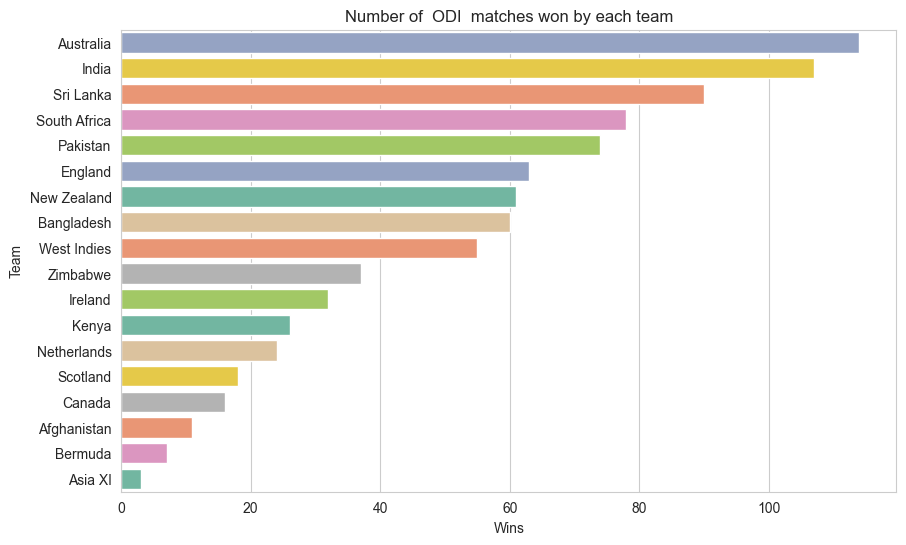

In [10]:
#Number of ODI matches won by each team.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize = (10,6))
sns.countplot(y = 'Winner',hue='Winner',data = clean_Total_06_11, palette = "Set2",order= clean_Total_06_11['Winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  ODI  matches won by each team')
#It can be seen Australia has the most number of ODI match wins closely followed by India

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

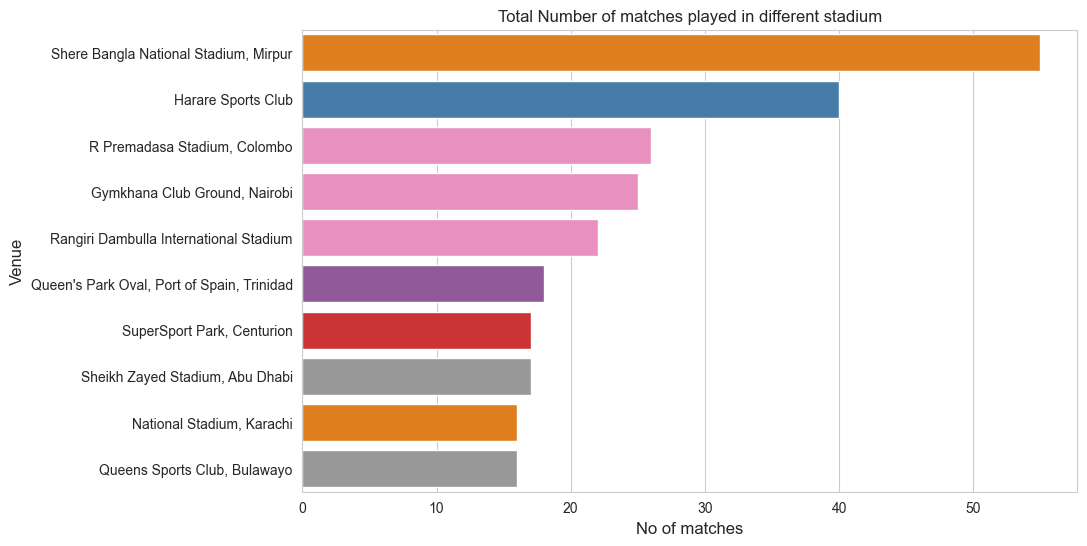

In [11]:
#Total number of matches played in a different stadium
plt.figure(figsize = (10,6))
sns.countplot(y = 'Stadium',hue='Stadium', palette = 'Set1',data = clean_Total_06_11,order = clean_Total_06_11['Stadium'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

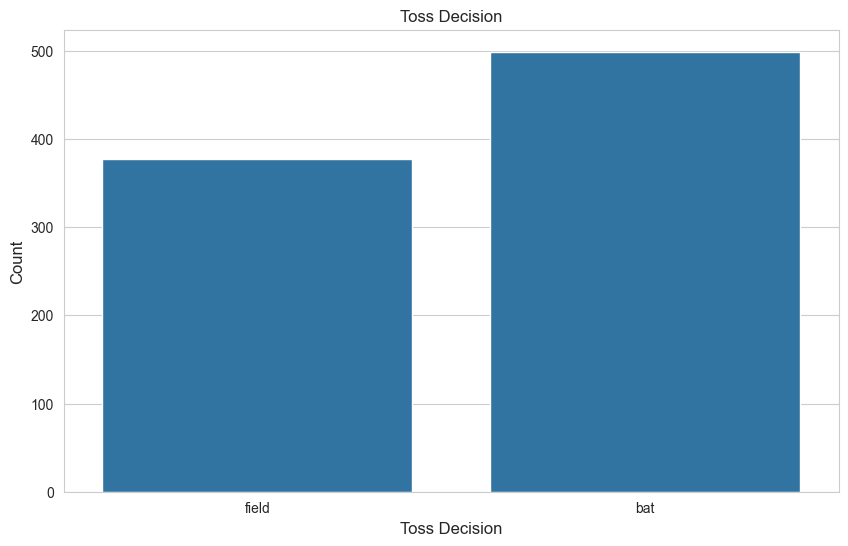

In [12]:
#Decision taken by after toss
plt.figure(figsize = (10,6))
sns.countplot(x = "Toss Decision", data=clean_Total_06_11)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

array([[<Axes: title={'center': 'Innings 1 RunRate'}>,
        <Axes: title={'center': 'Innings 2 RunRate'}>,
        <Axes: title={'center': 'Innings 1 Total 4s'}>,
        <Axes: title={'center': 'Innings 1 Total 6s'}>],
       [<Axes: title={'center': 'Innings 1 Total SR'}>,
        <Axes: title={'center': 'Innings 1 Extras'}>,
        <Axes: title={'center': 'Innings 2 Total 4s'}>,
        <Axes: title={'center': 'Innings 2 Total 6s'}>],
       [<Axes: title={'center': 'Innings 2 Total SR'}>,
        <Axes: title={'center': 'Innings 2 Extras'}>,
        <Axes: title={'center': 'Win by runs'}>,
        <Axes: title={'center': 'Win by wickets'}>],
       [<Axes: title={'center': 'Winning_team'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

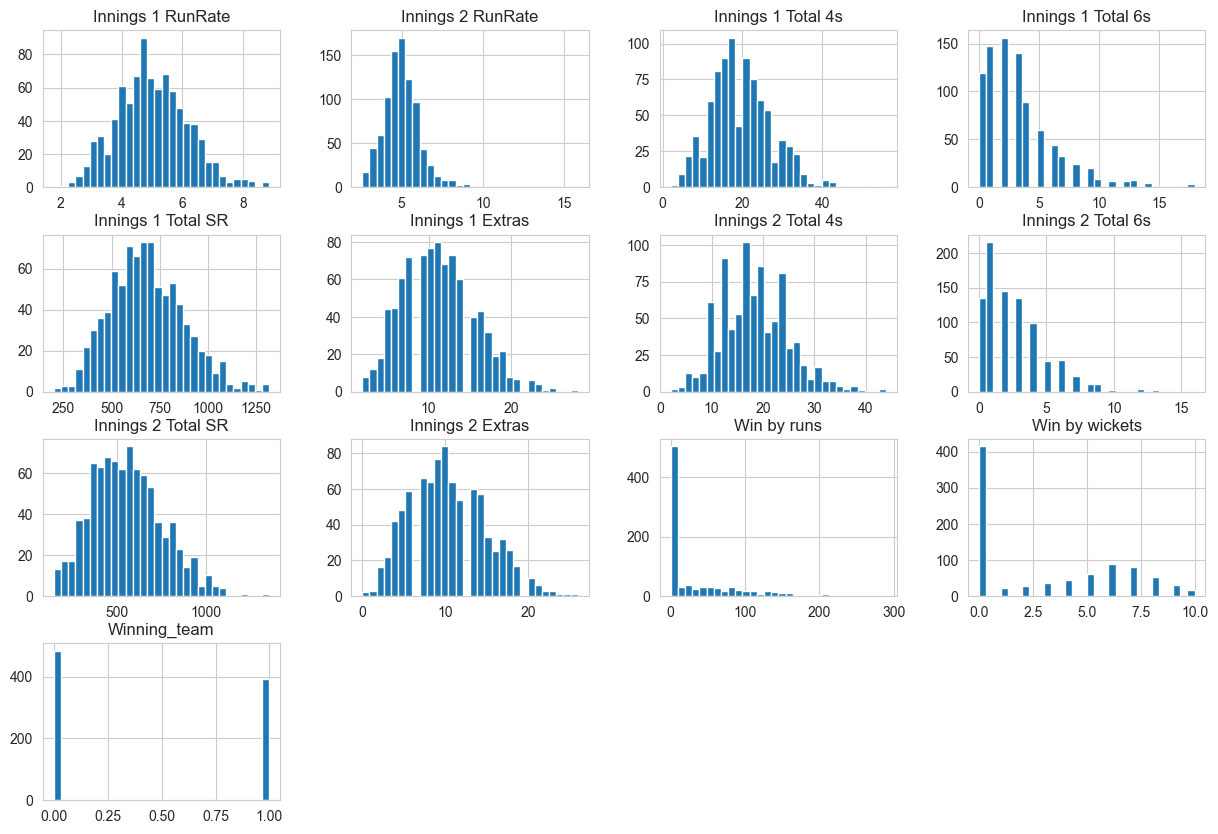

In [201]:
clean_Total_06_11.hist(bins=30, figsize=(15, 10))

### After Rule Change

Text(0.5, 1.0, 'Number of  ODI  matches won by each team')

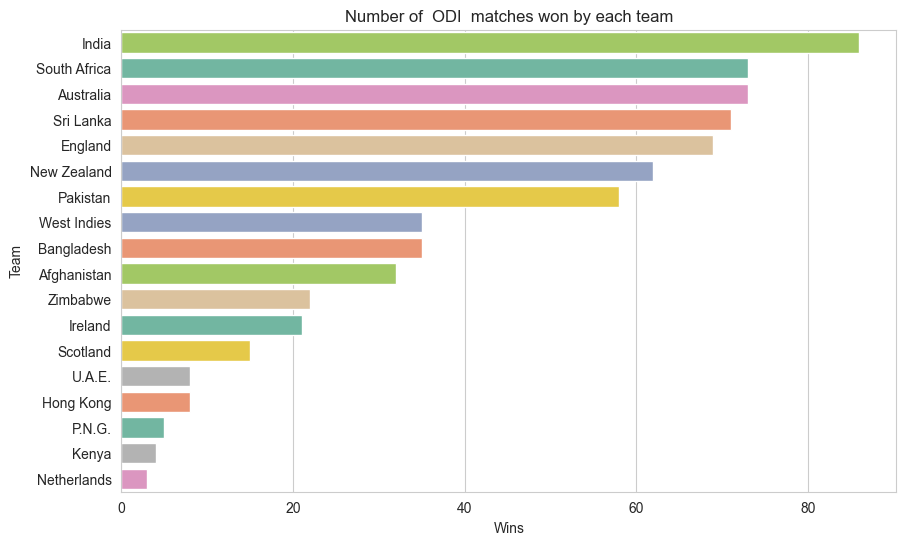

In [13]:
#Number of ODI matches won by each team.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize = (10,6))
sns.countplot(y = 'Winner',hue='Winner',data = clean_Total_12_17, palette = "Set2",order= clean_Total_12_17['Winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  ODI  matches won by each team')
#It can be seen Australia has the most number of ODI match wins closely followed by India

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

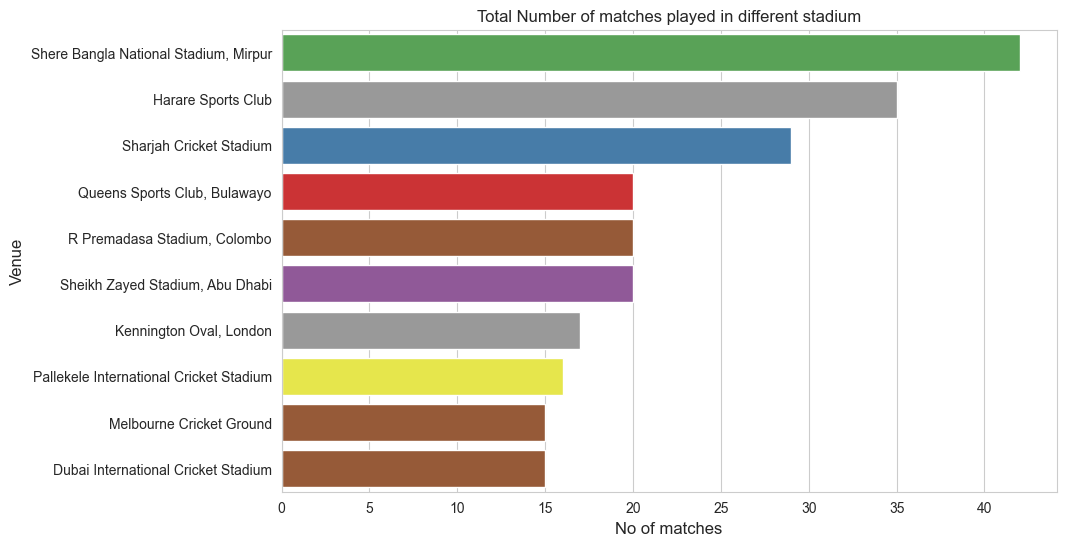

In [14]:
#Total number of matches played in a different stadium
plt.figure(figsize = (10,6))
sns.countplot(y = 'Stadium',hue='Stadium', palette = 'Set1',data = clean_Total_12_17,order = clean_Total_12_17['Stadium'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

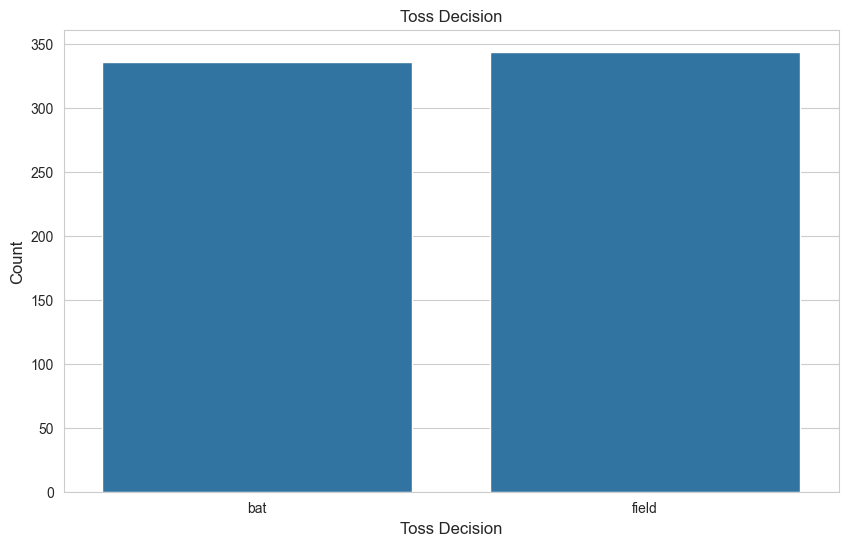

In [15]:
#Decision taken by after toss
plt.figure(figsize = (10,6))
sns.countplot(x = "Toss Decision", data=clean_Total_12_17)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [16]:
# x = ["Team 1","Stadium", "Toss Decision", "Winner"]
# for i in x:
#   print("------------")
#   print(clean_Total_06_11[i].unique())
#   print(clean_Total_06_11[i].value_counts())

## Preparing data for Model

In [17]:
display(clean_Total_06_11.head(3))
display(clean_Total_12_17.head(3))

,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
0,New Zealand,Sri Lanka,New Zealand,"Jan 3, 2006","Jade Stadium, Christchurch",New Zealand,field,Upul Tharanga,Darrell HairGary Baxter,5.1,...,675.32,7,18.0,4.0,599.60,17,0,5,0,0
1,New Zealand,Sri Lanka,New Zealand,"Jan 6, 2006","Westpac Stadium, Wellington",New Zealand,bat,Jeetan Patel,Darrell HairTony Hill,4.48,...,683.49,13,21.0,0.0,703.56,5,21,0,0,0
2,New Zealand,Sri Lanka,Sri Lanka,"Jan 8, 2006","McLean Park, Napier",Sri Lanka,bat,Chaminda Vaas,Darrell HairGary Baxter,5.46,...,604.81,11,17.0,3.0,633.52,8,20,0,1,1


,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
0,South Africa,Sri Lanka,South Africa,"Jan 11, 2012","Boland Park, Paarl",South Africa,bat,Morne Morkel,Billy DoctroveMarais Erasmus,6.02,...,850.91,8,3.0,0.0,228.23,4,258,0,0,0
1,South Africa,Sri Lanka,South Africa,"Jan 14, 2012","Buffalo Park, East London",South Africa,field,Jean-Paul Duminy,Billy DoctroveShaun George,4.72,...,507.20,6,15.0,3.0,645.57,4,0,5,0,0
2,South Africa,Sri Lanka,South Africa,"Jan 17, 2012","Chevrolet Park, Bloemfontein",Sri Lanka,bat,Faf du Plessis,Johan CloeteNigel Llong,5.32,...,862.27,9,16.0,0.0,578.31,4,4,0,0,1


In [18]:
clean_Total_06_11.iloc[[9]]

,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
9,Australia,Sri Lanka,Australia,"Jan 26, 2006",Adelaide Oval,Sri Lanka,bat,Andrew Symonds,Aleem DarSteve Davis,4.36,...,642.99,19,16.0,1.0,525.75,9,0,5,0,1


In [19]:
# print the data types of all columns
# print("-------------------------------------")
# print("BEFORE")
# print(clean_Total_06_11.dtypes)
#we Can see all columns are objects but we need certain columns as numeric so converting
# convert just columns "a" and "b"
clean_Total_06_11[["Innings 1 RunRate", "Innings 2 RunRate","Win by runs","Win by wickets"]] = clean_Total_06_11[["Innings 1 RunRate", "Innings 2 RunRate","Win by runs","Win by wickets"]].apply(pd.to_numeric)
clean_Total_12_17[["Innings 1 RunRate", "Innings 2 RunRate","Win by runs","Win by wickets"]] = clean_Total_12_17[["Innings 1 RunRate", "Innings 2 RunRate","Win by runs","Win by wickets"]].apply(pd.to_numeric)
#Checking Again
print("\n-------------------------------------")
print("AFTER")
print(clean_Total_06_11.dtypes)


-------------------------------------
AFTER
Team 1                 object
Team 2                 object
Winner                 object
Match Date             object
Stadium                object
Toss Winner            object
Toss Decision          object
Man Of Match           object
Umpires                object
Innings 1 RunRate     float64
Innings 2 RunRate     float64
Innings 1 Total 4s    float64
Innings 1 Total 6s    float64
Innings 1 Total SR    float64
Innings 1 Extras        int64
Innings 2 Total 4s    float64
Innings 2 Total 6s    float64
Innings 2 Total SR    float64
Innings 2 Extras        int64
Win by runs             int64
Win by wickets          int64
Winning_team            int32
TW                     object
dtype: object


In [20]:
#Converting data into dependent and independent.
#removing Winner Column and making Winning Team column as label
B_X = clean_Total_06_11.drop(["Winner"], axis=1).copy()
# B_y = clean_Total_06_11["Winner"]
B_X = B_X.drop(["Winning_team"], axis=1)
B_y = clean_Total_06_11["Winning_team"]

A_X = clean_Total_12_17.drop(["Winner"], axis=1).copy()
# A_y = clean_Total_12_17["Winner"]
A_X = A_X.drop(["Winning_team"], axis=1)
A_y = clean_Total_12_17["Winning_team"]
# t_X = x.copy()

#Now in X dropping columns not needed 
# drp_ls = ["Match Date","Stadium","Man Of Match","Umpires"]
drp_ls = ["Match Date","Stadium","Man Of Match","Umpires","Toss Winner"]
# drp_ls = ["Match Date","Stadium","Man Of Match","Umpires","Toss Winner","Team 1", "Team 2"]
B_X = Drop_col(B_X,drp_ls)
A_X = Drop_col(A_X,drp_ls)
# t_X = Drop_col(X,drp_ls)

In [21]:
B_y

0      0
1      0
2      1
3      0
4      1
      ..
871    1
872    1
873    1
874    0
875    0
Name: Winning_team, Length: 876, dtype: int32

In [22]:
B_X.head()

,Team 1,Team 2,Toss Decision,Innings 1 RunRate,Innings 2 RunRate,Innings 1 Total 4s,Innings 1 Total 6s,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,TW
0,New Zealand,Sri Lanka,field,5.10,5.33,27.0,0.0,675.32,7,18.0,4.0,599.60,17,0,5,0
1,New Zealand,Sri Lanka,bat,4.48,4.35,19.0,2.0,683.49,13,21.0,0.0,703.56,5,21,0,0
2,New Zealand,Sri Lanka,bat,5.46,5.23,26.0,1.0,604.81,11,17.0,3.0,633.52,8,20,0,1
3,Australia,Sri Lanka,field,6.36,4.04,23.0,8.0,691.30,17,13.0,0.0,605.85,13,116,0,1
4,Australia,South Africa,bat,4.57,4.73,17.0,4.0,608.23,14,21.0,2.0,455.78,18,0,5,0


In [23]:
#Several categorical values are present in the input data, so we are converting them into numerical values using the pandas, 
# get_dummies method.
# X = pd.get_dummies(X, ["Team 1","Team 2", "Toss Winner", "Toss Decision"], drop_first = True)
B_X = pd.get_dummies(B_X, ["Team 1","Team 2","Toss Decision", "TW"], drop_first = True)
A_X = pd.get_dummies(A_X, ["Team 1","Team 2","Toss Decision", "TW"], drop_first = True)
# B_X = pd.get_dummies(B_X, ["Team 1","Team 2", "Toss Winner"], drop_first = True)
# A_X = pd.get_dummies(A_X, ["Team 1","Team 2", "Toss Winner"], drop_first = True)
# B_X = pd.get_dummies(B_X, [ "Toss Decision"], drop_first = True)
# A_X = pd.get_dummies(A_X, [ "Toss Decision"], drop_first = True)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# B_y = le.fit_transform(clean_Total_06_11["Winner"])
# A_y = le.fit_transform(clean_Total_12_17["Winner"])

In [24]:
# Converting our data into a training set in order to create the model and test set for evaluating the created model.
from sklearn.model_selection import train_test_split
#Training set
B_x_bg_train, B_x_test, B_y_bg_train, B_y_test = train_test_split(B_X, B_y, train_size = 0.8,random_state=42)
A_x_bg_train, A_x_test, A_y_bg_train, A_y_test = train_test_split(A_X, A_y, train_size = 0.8,random_state=42)
#Validation set
B_x_train, B_x_val, B_y_train, B_y_val = train_test_split(B_x_bg_train, B_y_bg_train, train_size = 0.8,random_state=42)
A_x_train, A_x_val, A_y_train, A_y_val = train_test_split(A_x_bg_train, A_y_bg_train, train_size = 0.8,random_state=42)

In [25]:
A_y

0      0
1      0
2      0
3      1
4      1
      ..
675    0
676    0
677    0
678    0
679    0
Name: Winning_team, Length: 680, dtype: int32

In [26]:
len(clean_Total_06_11.columns)

23

In [27]:
clean_Total_06_11.columns

Index(['Team 1', 'Team 2', 'Winner', 'Match Date', 'Stadium', 'Toss Winner',
       'Toss Decision', 'Man Of Match', 'Umpires', 'Innings 1 RunRate',
       'Innings 2 RunRate', 'Innings 1 Total 4s', 'Innings 1 Total 6s',
       'Innings 1 Total SR', 'Innings 1 Extras', 'Innings 2 Total 4s',
       'Innings 2 Total 6s', 'Innings 2 Total SR', 'Innings 2 Extras',
       'Win by runs', 'Win by wickets', 'Winning_team', 'TW'],
      dtype='object')

In [28]:
print("------------Counts--------------")
print(f'Before Rule Change Training Set {len(B_x_train)}\n')
print(f'Before Rule Change Validation Set {len(B_x_val)}\n')
print(f'Before Rule Change Testing Set {len(B_x_test)}\n\n')
print(f'After Rule Change Training Set {len(A_x_train)}\n')
print(f'After Rule Change Validation Set {len(A_x_val)}\n')
print(f'After Rule Change Testing Set {len(A_x_test)}\n\n')

------------Counts--------------
Before Rule Change Training Set 560

Before Rule Change Validation Set 140

Before Rule Change Testing Set 176


After Rule Change Training Set 435

After Rule Change Validation Set 109

After Rule Change Testing Set 136




## Model Creation and Evaluation

### Base Models

In [82]:
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import RobustScaler

st_x= RobustScaler()    
base_B_x_train= st_x.fit_transform(B_x_train.values)
base_B_x_val= st_x.transform(B_x_val.values)

### Logistic Regression

In [89]:

from sklearn.linear_model import LogisticRegression

clf = linear_model.LogisticRegression()
clf.fit(base_B_x_train, B_y_train)
#Predicting the test set result  
B_base_y_pred= clf.predict(base_B_x_val)  
B_ac = accuracy_score(B_base_y_pred, B_y_val)
print(f'Before Rule Change : {B_ac}\n')

Before Rule Change : 0.6142857142857143



### Neural Network

In [30]:
# Define the neural network model
temp_model = keras.Sequential([
    # keras.layers.Input( shape=(base_B_x_train.shape[1],)),  # Input layer
    # keras.layers.Dense(512, activation='relu'),
    # keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    # keras.layers.Dropout(0.3),
    # keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    # keras.layers.Dense(100), # add 100 dense neurons
    # keras.layers.Dense(10), # add another layer with 10 neurons
    # keras.layers.Dense(1)
    # keras.layers.Dense(1, activation='sigmoid')  # Output layer with linear activation for regression
    keras.layers.Dense(128, activation='relu', input_shape=(base_B_x_train.shape[1],)),
    keras.layers.Dense(100),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with Huber loss
# huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
# temp_model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression
temp_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),

                optimizer=tf.keras.optimizers.Adam(), 

                metrics=['accuracy'])

# Train the model
temp_model.fit(base_B_x_train, B_y_train, epochs=100, batch_size=64, validation_data=(base_B_x_val, B_y_val))


Epoch 1/100


9/9 [==============================] - 2s 40ms/step - loss: 0.6864 - accuracy: 0.5589 - val_loss: 0.6877 - val_accuracy: 0.5286
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6819 - accuracy: 0.5607 - val_loss: 0.6931 - val_accuracy: 0.5857
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6508 - accuracy: 0.6268 - val_loss: 0.6842 - val_accuracy: 0.5500
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6405 - accuracy: 0.6375 - val_loss: 0.6856 - val_accuracy: 0.5714
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6208 - accuracy: 0.6714 - val_loss: 0.6880 - val_accuracy: 0.5214
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6050 - accuracy: 0.7018 - val_loss: 0.6816 - val_accuracy: 0.5286
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5881 - accuracy: 0.6964 - val_loss: 0.6879 - val_accuracy: 0.5286
Epoch 8/100
9/9 [======

<Axes: >

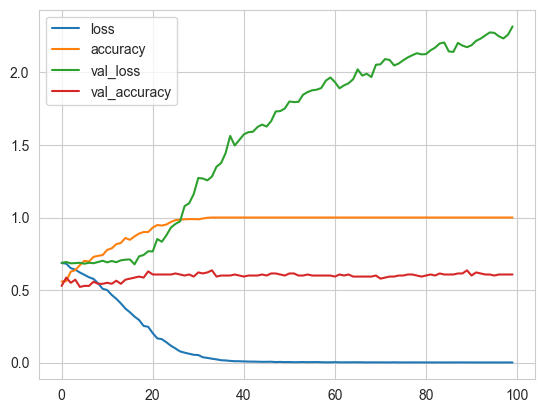

In [31]:
model_losses = pd.DataFrame(temp_model.history.history)
model_losses.plot()

### MLP Model

In [91]:
#Looking at a BaseLine model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

st_x= RobustScaler()    
base_B_x_train= st_x.fit_transform(B_x_train.values)    
base_B_x_val= st_x.transform(B_x_val.values)
B_base_model = MLPClassifier(random_state=42)
B_base_model.fit(base_B_x_train, B_y_train)
#Predicting the test set result  
B_base_y_pred= B_base_model.predict(base_B_x_val)  
B_ac = accuracy_score(B_base_y_pred, B_y_val)
print(f'Before Rule Change : {B_ac}\n')

Before Rule Change : 0.6285714285714286



Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


### Random Forest

In [76]:
B_base_model = RandomForestClassifier(random_state=142)
B_base_model.fit(base_B_x_train, B_y_train)
#Predicting the test set result  
B_base_y_pred= B_base_model.predict(base_B_x_val)  
B_ac = accuracy_score(B_base_y_pred, B_y_val)
print(f'Before Rule Change : {B_ac}\n')

Before Rule Change : 0.6428571428571429



### XG Boost

In [35]:

Rf_base_model = xgb.XGBClassifier(random_state=42)
Rf_base_model.fit(base_B_x_train, B_y_train)
#Predicting the test set result  
B_base_y_pred= Rf_base_model.predict(base_B_x_val)  
B_ac = accuracy_score(B_base_y_pred, B_y_val)
print(f'Before Rule Change : {B_ac}\n')

c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Before Rule Change : 0.6357142857142857



In [90]:
# Create a DataFrame
df = pd.DataFrame({
    "Model": ["Logistic Regression","Simple Dense Neural Network","Multi Layer Perceptron","Random Forest", "XGBoost"],
    "Accuracy score": [0.61,0.64,0.57,0.61, 0.63]
})
# Print the DataFrame
df

,Model,Accuracy score
0,Logistic Regression,0.61
1,Neural Network,0.64
2,MLP,0.57
3,Random Forest,0.61
4,XGBoost,0.63


## Hyper parameter Tuning

### Random Forest Model

In [37]:
Rf_base_model = RandomForestClassifier(random_state=42)
B_base_model = RandomForestClassifier()
B_base_model.fit(base_B_x_train, B_y_train)
#Predicting the test set result  
B_base_y_pred= B_base_model.predict(base_B_x_val)  
B_ac = accuracy_score(B_base_y_pred, B_y_val)
print(f'Before Rule Change : {B_ac}\n')

Before Rule Change : 0.6142857142857143



In [38]:
B_model = RandomForestClassifier(random_state=42)
A_model = RandomForestClassifier(random_state=42)


Before Rule Change : 0.6306818181818182

Roc Curve for Model predicting before rule change


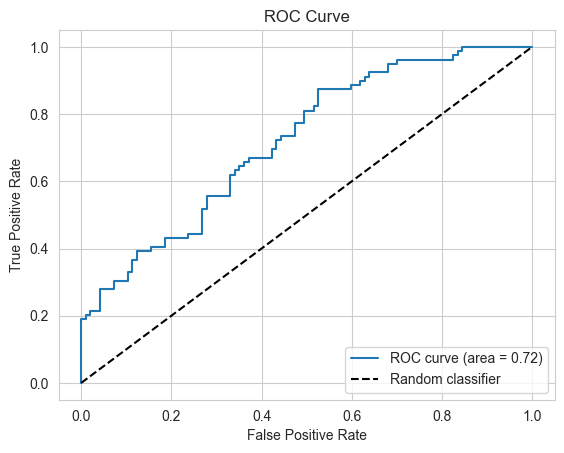

Confusion for Model predicting before rule change


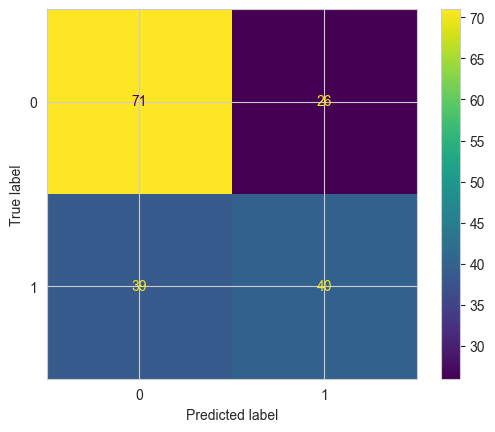

After Rule Change : 0.6691176470588235

Roc Curve for Model predicting after rule change


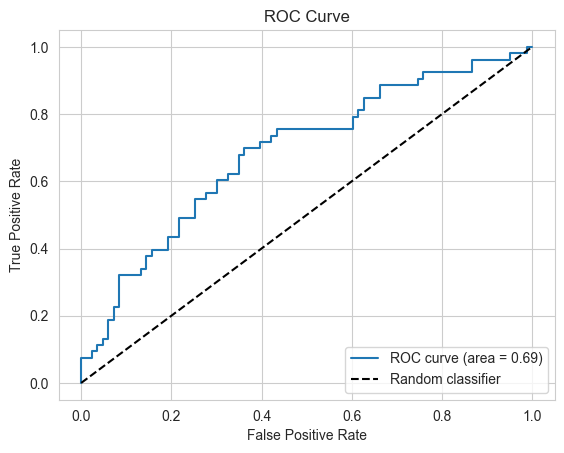

Confusion for Model predicting after rule change


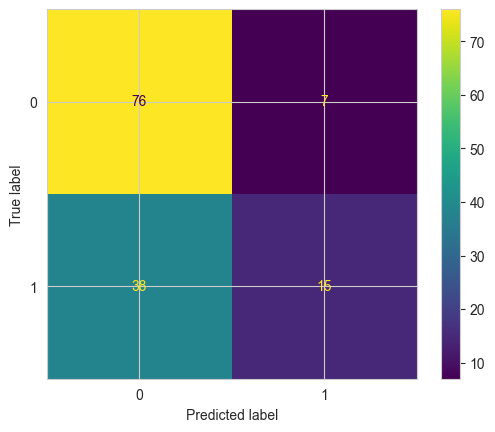

In [40]:

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
def print_roc(y_test, y_pred_prob):
    # Compute the false positive rate (FPR)  
    # and true positive rate (TPR) for different classification thresholds 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
    # Compute the ROC AUC score 
    roc_auc = roc_auc_score(y_test, y_pred_prob)  
    # Plot the ROC curve 
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
    # roc curve for tpr = fpr  
    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('ROC Curve') 
    plt.legend(loc="lower right") 
    plt.show()

#Model train
B_y_pred = B_rf_cv.best_estimator_.predict(B_x_test.values)
B_y_pred_prob = B_rf_cv.best_estimator_.predict_proba(B_x_test.values)[:, 1]

A_y_pred = A_rf_cv.best_estimator_.predict(A_x_test.values)
A_y_pred_prob = A_rf_cv.best_estimator_.predict_proba(A_x_test.values)[:, 1]

B_ac = accuracy_score(B_y_test,B_y_pred)
print(f'Before Rule Change : {B_ac}\n')
print("Roc Curve for Model predicting before rule change")
print_roc(B_y_test, B_y_pred_prob)
print("Confusion for Model predicting before rule change")
confusion_matrix = metrics.confusion_matrix(B_y_test, B_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

A_ac = accuracy_score(A_y_test,A_y_pred)
print(f'After Rule Change : {A_ac}\n')
print("Roc Curve for Model predicting after rule change")
print_roc(A_y_test, A_y_pred_prob)
print("Confusion for Model predicting after rule change")
confusion_matrix = metrics.confusion_matrix(A_y_test, A_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()


In [41]:
#Best Parameters
B_rf_cv_bst_params = B_rf_cv.best_params_
print(f'Best parameter for Before Rule change model {B_rf_cv_bst_params} \n')
# Best parameter for Before Rule change model {'RandomForest__max_depth': 10, 'RandomForest__min_samples_leaf': 2, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 300} 
print("-----------------------------------------------")
A_rf_cv_bst_params = A_rf_cv.best_params_
print(f'\nBest parameter for After Rule change model {A_rf_cv_bst_params} \n')
# Best parameter for After Rule change model {'RandomForest__max_depth': 20, 'RandomForest__min_samples_leaf': 2, 'RandomForest__min_samples_split': 5, 'RandomForest__n_estimators': 200}

Best parameter for Before Rule change model {'RandomForest__max_depth': 20, 'RandomForest__min_samples_leaf': 2, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 100} 

-----------------------------------------------

Best parameter for After Rule change model {'RandomForest__max_depth': 30, 'RandomForest__min_samples_leaf': 2, 'RandomForest__min_samples_split': 5, 'RandomForest__n_estimators': 100} 



The accuracy of the Random Forests model Before Rule Change :	 0.5738636363636364
Roc Curve for Model predicting before rule change


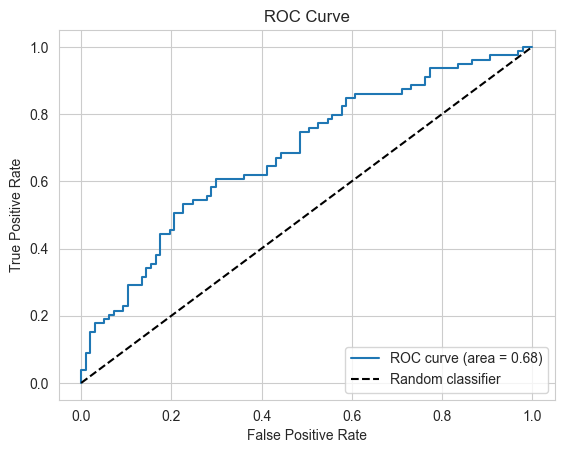


The accuracy of the Random Forests model After Rule Change :	 0.6102941176470589
Roc Curve for Model predicting after rule change


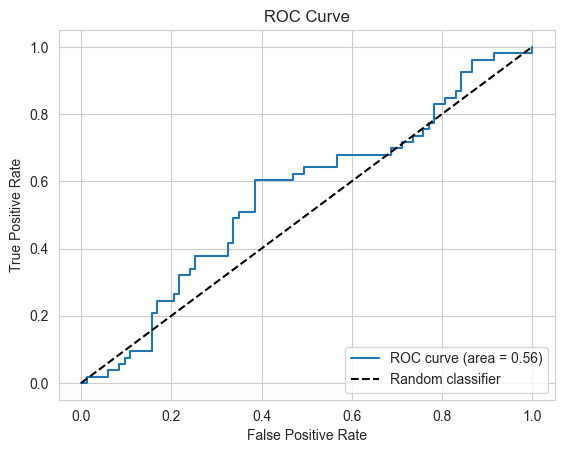

In [42]:
#Creating the best Random Forest for model explainations
# Best parameter for Before Rule change model {'RandomForest__max_depth': 10, 'RandomForest__min_samples_leaf': 2, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 300}
# Best parameter for After Rule change model {'RandomForest__max_depth': 20, 'RandomForest__min_samples_leaf': 2, 'RandomForest__min_samples_split': 5, 'RandomForest__n_estimators': 200} 
# B_fin_rf_model = RandomForestClassifier(max_depth =  20, min_samples_leaf =  2, min_samples_split =  5, n_estimators =  200)
# A_fin_rf_model = RandomForestClassifier(max_depth =  10, min_samples_leaf =  2, min_samples_split =  2, n_estimators =  100)
# B_fin_rf_model = RandomForestClassifier(max_depth =  20, min_samples_leaf =  2, min_samples_split =  2, n_estimators =  200)
# A_fin_rf_model = RandomForestClassifier(max_depth =  30, min_samples_leaf =  2, min_samples_split =  5, n_estimators =  100)
B_fin_rf_model = RandomForestClassifier(max_depth =  20, min_samples_leaf =  2, min_samples_split =  2, n_estimators =  100)
A_fin_rf_model = RandomForestClassifier(max_depth =  30, min_samples_leaf =  2, min_samples_split =  5, n_estimators =  100)
B_R_scaler = RobustScaler()
B_xt_bg_train = B_R_scaler.fit_transform(B_x_bg_train.values)
B_xt_bg_test = B_R_scaler.transform(B_x_test.values)

A_R_scaler = RobustScaler()
A_xt_bg_train = A_R_scaler.fit_transform(A_x_bg_train.values)
A_xt_bg_test = A_R_scaler.transform(A_x_test.values)

#training the best model on train + val
B_fin_rf_model.fit(B_xt_bg_train,B_y_bg_train)
A_fin_rf_model.fit(A_xt_bg_train,A_y_bg_train)

#Predicting on test set
B_random_forest_preds = B_fin_rf_model.predict(B_x_test.values)
A_random_forest_preds = A_fin_rf_model.predict(A_x_test.values)

#Accuracy Achieved
B_ac = accuracy_score(B_y_test, B_y_pred)
print('The accuracy of the Random Forests model Before Rule Change :\t',accuracy_score(B_random_forest_preds,B_y_test))
print("Roc Curve for Model predicting before rule change")
print_roc(B_y_test, B_fin_rf_model.predict_proba(B_x_test.values)[:, 1])
A_ac = accuracy_score(A_y_test,A_y_pred)
print('\nThe accuracy of the Random Forests model After Rule Change :\t',accuracy_score(A_random_forest_preds,A_y_test))
print("Roc Curve for Model predicting after rule change")
print_roc(A_y_test, A_fin_rf_model.predict_proba(A_x_test.values)[:, 1])


### XG Boost Model

In [43]:
#Making Scaled data 
B_R_scaler = RobustScaler()
# B_R_scaler = MinMaxScaler()
B_xt_bg_train = B_R_scaler.fit_transform(B_x_bg_train.values)
B_xt_train = B_R_scaler.transform(B_x_train.values)
B_xt_val = B_R_scaler.transform(B_x_val.values)
B_xt_test = B_R_scaler.transform(B_x_test.values)

A_R_scaler = RobustScaler()
# A_R_scaler = MinMaxScaler()
A_xt_bg_train = A_R_scaler.fit_transform(A_x_bg_train.values)
A_xt_train = A_R_scaler.transform(A_x_train.values)
A_xt_val = A_R_scaler.transform(A_x_val.values)
A_xt_test = A_R_scaler.transform(A_x_test.values)

#Converting the Data
#Before Rule Change
B_xg_train = xgb.DMatrix(B_xt_train, label=B_y_train)
B_xg_val = xgb.DMatrix(B_xt_val, label=B_y_val)
B_xg_bg_train = xgb.DMatrix(B_xt_bg_train, label=B_y_bg_train)
B_xg_test = xgb.DMatrix(B_xt_test, label=B_y_test)

#After Rule Change
A_xg_train = xgb.DMatrix(A_xt_train, label=A_y_train)
A_xg_val = xgb.DMatrix(A_xt_val, label=A_y_val)
A_xg_bg_train = xgb.DMatrix(A_xt_bg_train, label=A_y_bg_train)
A_xg_test = xgb.DMatrix(A_xt_test, label=A_y_test)




c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [44]:
from sklearn.metrics import accuracy_score 
# Evaluate the model on the validation set
def evaluate_model(model, val_data):
    preds = model.predict(val_data)
    preds = [round(i) for i in preds]
    acc_sc = accuracy_score(val_data.get_label(), preds)
    return (acc_sc,preds)   
#Tuning grid for parameters
def tune_xgBoost(train_data,test_data):
    tst_params = {
        'max_depth': [10, 20, 30,40,50],
        'learning_rate': [0.01, 0.05, 0.1,0.001],
        'min_child_weight': range(1,5)
        # 'class_weight': ['balanced', 'balanced_subsample']
    }
    train_stats = []
    for mx_dept in tst_params['max_depth']:
        for lr_rt in tst_params['learning_rate']:
            for m_wt in tst_params['min_child_weight']:
                
                model_params = {
                        "eta": lr_rt,
                        "max_depth": mx_dept,
                        "objective": "binary:logistic",
                        "learning_rate" :lr_rt,
                        "eval_metric": "logloss",
                        "min_child_weight": m_wt,
                        "seed":42
                    }
                # Train the model
                model = xgb.train(model_params, train_data, 300, [(train_data, "train"),(test_data, "valid")], early_stopping_rounds=5, verbose_eval=0)
                # Evaluate the model on the validation set
                train_acc = evaluate_model(model, test_data)[0]
                train_stat = {"Train_Acc" :train_acc,"max_depth": mx_dept,"learning_rate":lr_rt,"min_child_weight":m_wt}
                # print(train_stat)
                train_stats.append(train_stat)
    #Sorting and showing the best hyperparameter setting
    srtd_train_stats = sorted(train_stats, key=lambda d: d['Train_Acc'], reverse=True)
    # print(f'Best hyper parameter values found {srtd_train_stats[0]}')
    return(srtd_train_stats[0])
B_params = tune_xgBoost(B_xg_train,B_xg_val)
A_params = tune_xgBoost(A_xg_train,A_xg_val)
print(f'Best hyper parameters for Before Rule change data:\n{B_params}\n')
print(f'Best hyper parameters for After Rule change data:\n{A_params}')


c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as 

Best hyper parameters for Before Rule change data:
{'Train_Acc': 0.7642857142857142, 'max_depth': 30, 'learning_rate': 0.1, 'min_child_weight': 1}

Best hyper parameters for After Rule change data:
{'Train_Acc': 0.6513761467889908, 'max_depth': 10, 'learning_rate': 0.05, 'min_child_weight': 2}


c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Before Rule Change : 0.6818181818181818

Roc Curve for Model predicting before rule change


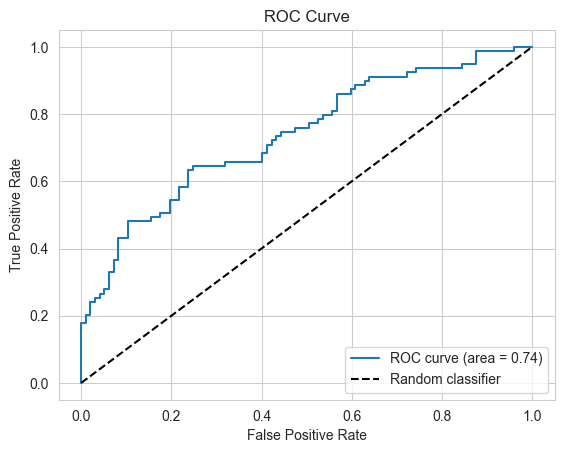

Confusion for Model predicting before rule change


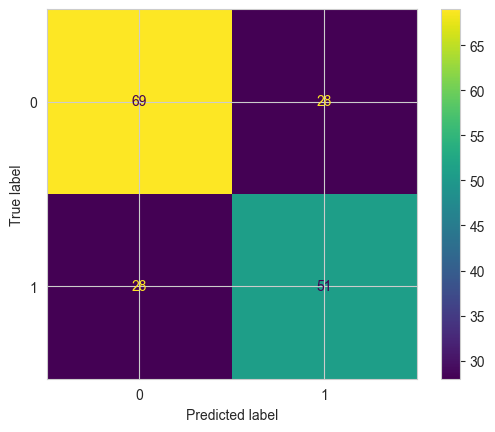

c:\Users\neila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Accuracy by Xg_boost model for After Rule Change 0.6323529411764706


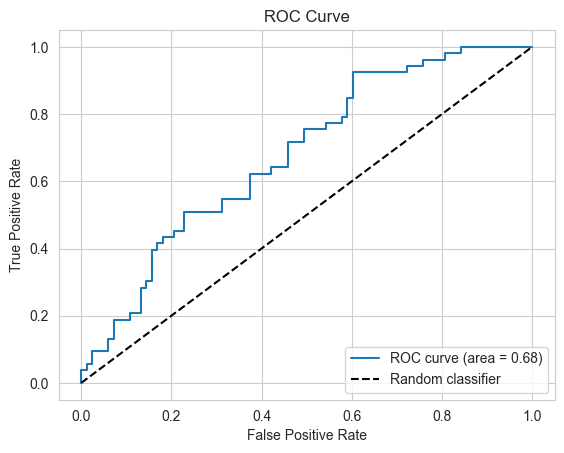

Confusion for Model predicting before rule change


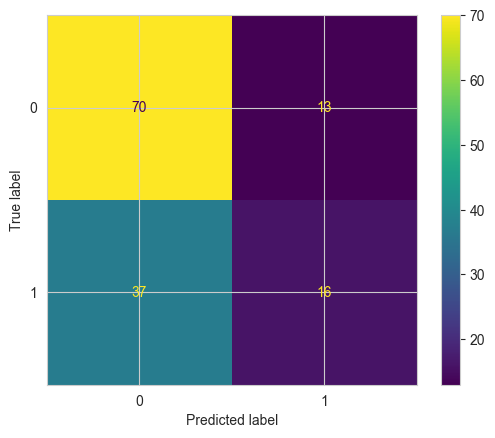

In [45]:
#Creating the best Xg Boosted model
#Before Rule Change
B_xg_best_params = {
    "eta": 0.1,
    "max_depth": 30,
    # "objective": "multi:softmax",
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    # "num_class": 2,
    "min_child_weight": 1,
    "seed":42
}
# xgb.train(model_params, train_data, 300, [(train_data, "train"),(test_data, "valid")], early_stopping_rounds=5, verbose_eval=0)
B_bst_xg_model = xgb.train(B_xg_best_params, B_xg_train, 300,[(B_xg_train, "train"),(B_xg_val, "valid")],early_stopping_rounds=5, verbose_eval=0)
# Predict probabilities
B_xg_pred_proba = B_bst_xg_model.predict(B_xg_test)
B_xg_pred = [round(i)for i in B_xg_pred_proba]

B_xg_boost_test_acc = evaluate_model(B_bst_xg_model, B_xg_test)
# print(f'Accuracy by Xg_boost model for Before Rule Change {B_xg_boost_test_acc[0]}')
print(f'Before Rule Change : {B_xg_boost_test_acc[0]}\n')
print("Roc Curve for Model predicting before rule change")
print_roc(B_y_test, B_xg_pred_proba)
print("Confusion for Model predicting before rule change")
confusion_matrix = metrics.confusion_matrix(B_y_test, B_xg_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
#After Rule Change
A_xg_best_params = {
    "eta": 0.05,
    "max_depth": 10,
    # "objective": "multi:softmax",
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    # "num_class": 2,
    "min_child_weight": 2,
    "seed":42
}
# xgb.train(B_xg_best_params, B_xg_train, 300,[(B_xg_train, "train"),(B_xg_val, "valid")],early_stopping_rounds=5, verbose_eval=0)
A_bst_xg_model = xgb.train(A_xg_best_params, A_xg_bg_train, 300,[(A_xg_train, "train"),(A_xg_val, "valid")],early_stopping_rounds=5, verbose_eval=0)
# Predict probabilities
A_xg_pred_proba = A_bst_xg_model.predict(A_xg_test)
A_xg_pred = [round(i)for i in A_xg_pred_proba]
A_xg_boost_test_acc = evaluate_model(A_bst_xg_model, A_xg_test)
print(f'Accuracy by Xg_boost model for After Rule Change {A_xg_boost_test_acc[0]}')
print_roc(A_y_test, A_xg_pred_proba)
print("Confusion for Model predicting before rule change")
confusion_matrix = metrics.confusion_matrix(A_y_test, A_xg_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

### Analyzing each individual match for impact due to the rule change

In [46]:
#Looking as most occured matches in test set for comparison

# Get the row indices of the B_x_test DataFrame
B_x_test_indices = B_x_test.index
A_x_test_indices = A_x_test.index

# Fetch the same indices from the clean_Total_06_11 DataFrame
clean_Total_06_11_subset = clean_Total_06_11.iloc[B_x_test_indices]
clean_Total_12_17_subset = clean_Total_12_17.iloc[A_x_test_indices]

In [47]:
#Find unique matches for analyzing later
#for BEFORE rule change
uniq_match_Before = clean_Total_06_11.groupby(['Team 1','Team 2']).size().reset_index().rename(columns={0:'count'}).copy()
uniq_match_Before = uniq_match_Before.sort_values(by=['count'], ascending=False)
display(uniq_match_Before.head(8))
#for AFTER rule change
uniq_match_After = clean_Total_12_17.groupby(['Team 1','Team 2']).size().reset_index().rename(columns={0:'count'}).copy()
uniq_match_After = uniq_match_After.sort_values(by=['count'], ascending=False)
display(uniq_match_After.head(8))

,Team 1,Team 2,count
169,Zimbabwe,Bangladesh,19
74,India,Sri Lanka,19
34,Bangladesh,Zimbabwe,19
151,Sri Lanka,India,17
68,India,England,17
16,Australia,Sri Lanka,16
7,Australia,England,16
67,India,Australia,15


,Team 1,Team 2,count
55,India,Sri Lanka,18
89,Pakistan,Sri Lanka,14
41,England,Pakistan,14
36,England,Australia,14
141,Zimbabwe,Afghanistan,14
21,Australia,Sri Lanka,13
18,Australia,Pakistan,12
119,Sri Lanka,Pakistan,12


### Analysis of INDIA vs Sri Lanka and impact due to the rule change

In [48]:
# #Creating a list of indexes to store all row index of India vs Sri Lanka Match from both before and after rule change
# # Get the indices of the rows where Team 1 = "India" and Team 2 is "Sri Lanka" and Store the indices in a list
# #BEFORE Rule change
# Bef_india_srilanka_indices = clean_Total_06_11[(clean_Total_06_11['Team 1'] == "India") & (clean_Total_06_11['Team 2'] == "Sri Lanka")].index.tolist()
# #AFTER Rule change
# After_india_srilanka_indices = clean_Total_12_17[(clean_Total_12_17['Team 1'] == "India") & (clean_Total_12_17['Team 2'] == "Sri Lanka")].index.tolist()

# #Indixes of focus 
# print(Bef_india_srilanka_indices[0:5])
# print(After_india_srilanka_indices[0:5])

In [49]:
def ls_text_incices(test_df,team1,team2):
    # Initialize the counter
    counter = -1

    # Create a list to store the counts
    counts = []

    # Iterate over the DataFrame
    for i in range(len(test_df)):
        # If Team 1 is India and Team 2 is Sri Lanka, increment the counter
        if( test_df.iloc[i]['Team 1'] == team1 and test_df.iloc[i]['Team 2'] == team2):
            counter += 1
            # Add the counter to the list of counts
            counts.append(counter)
        elif( test_df.iloc[i]['Team 1'] == team2 and test_df.iloc[i]['Team 2'] == team1):
            counter += 1
            # Add the counter to the list of counts
            counts.append(counter)
        else:
            counter += 1

    # Print the list of counts
    return counts

#Variable input values
# test_df = clean_Total_06_11_subset
# team1 = "India"
# team2 = "Sri Lanka"

ls_b_test = ls_text_incices(clean_Total_06_11_subset,"India","Sri Lanka")
# ls_b_test = ls_text_incices(clean_Total_06_11_subset)
print(f'List of indices Before Rule Change{ls_b_test}')
ls_a_test = ls_text_incices(clean_Total_12_17_subset,"India","Sri Lanka")
# ls_a_test = ls_text_incices(clean_Total_12_17_subset)
print(f'List of indices After Rule Change{ls_a_test}')

List of indices Before Rule Change[49, 63, 92, 154]
List of indices After Rule Change[2, 38, 47, 73, 90]


In [50]:
# Create a new DataFrame from the row indices
Before_SrivInd = clean_Total_06_11_subset.iloc[ls_b_test].copy()
Before_SrivInd['row_index'] = ls_b_test
After_SrivInd = clean_Total_12_17_subset.iloc[ls_a_test].copy()
After_SrivInd['row_index'] = ls_a_test
print("All India vs SriLanka matches Before Rule Chnage")
display(Before_SrivInd)
print("All India vs SriLanka matches After Rule Chnage")
display(After_SrivInd)

All India vs SriLanka matches Before Rule Chnage


,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW,row_index
424,Sri Lanka,India,Sri Lanka,"Aug 29, 2008","R Premadasa Stadium, Colombo",Sri Lanka,bat,Nuwan Kulasekara,Billy DoctroveTyron Wijewardene,4.54,...,13,12.0,1.0,724.22,7,112,0,0,0,49
697,Sri Lanka,India,Sri Lanka,"Aug 28, 2010",Rangiri Dambulla International Stadium,Sri Lanka,bat,Tillakaratne Dilshan,Asad RaufAsoka de Silva,5.98,...,6,22.0,4.0,618.24,17,74,0,0,0,63
594,India,Sri Lanka,India,"Dec 21, 2009","Barabati Stadium, Cuttack",Sri Lanka,bat,Ravindra Jadeja,Marais ErasmusSanjay Hazare,5.39,...,9,32.0,1.0,471.69,7,0,7,0,1,92
801,India,Sri Lanka,India,"Apr 2, 2011","Wankhede Stadium, Mumbai",Sri Lanka,bat,MS Dhoni,Aleem DarSimon Taufel,5.48,...,12,25.0,2.0,482.17,15,0,6,0,1,154


All India vs SriLanka matches After Rule Chnage


,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW,row_index
63,Sri Lanka,India,Sri Lanka,"Jul 24, 2012",Mahinda Rajapaksa International Cricket Stadiu...,India,bat,Thisara Perera,Bruce OxenfordRuchira Palliyaguruge,4.11,...,11,14.0,0.0,260.37,6,0,9,0,1,2
675,India,Sri Lanka,India,"Dec 13, 2017","Punjab Cricket Association IS Bindra Stadium, ...",Sri Lanka,field,Rohit Sharma,NandanPaul Reiffel,7.84,...,4,24.0,3.0,807.99,11,141,0,0,1,38
676,India,Sri Lanka,India,"Dec 17, 2017",Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,India,field,Kuldeep Yadav,Nitin MenonSimon Fry,4.79,...,8,24.0,4.0,354.68,12,0,8,0,0,47
294,India,Sri Lanka,India,"Nov 6, 2014","Sardar Patel Stadium, Motera, Ahmedabad",Sri Lanka,bat,Ambati Rayudu,Bruce OxenfordVineet Kulkarni,5.48,...,9,21.0,8.0,688.08,3,0,6,0,1,73
65,Sri Lanka,India,India,"Jul 31, 2012","R Premadasa Stadium, Colombo",Sri Lanka,bat,Virat Kohli,Bruce OxenfordKumar Dharmasena,5.02,...,6,24.0,2.0,422.35,10,0,6,1,0,90


## Shapley Explainers

### Explainers for XG Boost

In [146]:
import shap
import matplotlib.pyplot as pl

shap.initjs()
# Create Tree Explainer object that can calculate shap values
B_xg_Bst_explainer = shap.TreeExplainer(B_bst_xg_model)
A_xg_Bst_explainer = shap.TreeExplainer(A_bst_xg_model)

#Calculating shap values
B_xg_bst_shap_values = B_xg_Bst_explainer.shap_values(B_x_test.values)
A_xg_bst_shap_values = A_xg_Bst_explainer.shap_values(A_x_test.values)

B_xg_bst_expected = B_xg_Bst_explainer.expected_value
A_xg_bst_expected = A_xg_Bst_explainer.expected_value

[23:11:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [119]:
B_xg_bst_shap_values

array([-9.79109947e-03,  4.29066181e-01, -1.71679646e-01, -3.29749063e-02,
        4.25487198e-02,  1.91553272e-02,  1.46337509e-01, -1.71393111e-01,
       -1.44987479e-01,  9.50964153e-01,  7.90751502e-02, -2.54491866e-01,
        0.00000000e+00,  1.05459414e-01, -1.38701750e-02,  0.00000000e+00,
       -2.76741814e-02, -1.64088357e-04,  0.00000000e+00,  1.49574690e-02,
        0.00000000e+00, -1.60880154e-05, -2.41426111e-04,  9.87751596e-03,
        1.42473103e-02,  0.00000000e+00,  1.36660496e-02,  6.72723260e-03,
       -1.12938718e-03, -3.69876914e-04,  0.00000000e+00, -1.29005127e-02,
        1.96175417e-03,  2.23931726e-02,  0.00000000e+00, -1.69537924e-02,
        0.00000000e+00, -1.15939900e-02,  0.00000000e+00,  4.16113697e-02,
        0.00000000e+00,  1.58887282e-02, -2.96240766e-03,  2.77114776e-03,
       -1.43849114e-02, -7.14928191e-03,  0.00000000e+00,  1.21387886e-03,
        3.44774709e-03,  5.12735806e-02,  7.71167949e-02], dtype=float32)

In [52]:
# # compute SHAP values needed for graphs 
from shap import TreeExplainer, Explanation
from shap.plots import waterfall


# Information needed for Force plot
B_xg_shap_values = B_xg_Bst_explainer.shap_values(B_x_test.values)
A_xg_shap_values = A_xg_Bst_explainer.shap_values(A_x_test.values)



# Information needed for Waterfall plot
B_xg_sv = B_xg_Bst_explainer(B_x_test)
B_xg_exp = Explanation(B_xg_sv.values, 
                  B_xg_sv.base_values, 
                  data=B_x_test.values, 
                  feature_names=B_x_test.columns)
A_xg_sv = A_xg_Bst_explainer(A_x_test)
A_xg_exp = Explanation(A_xg_sv.values, 
                  A_xg_sv.base_values, 
                  data=A_x_test.values, 
                  feature_names=A_x_test.columns)


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [53]:
shap.initjs()
shap.force_plot(B_xg_Bst_explainer.expected_value, B_xg_shap_values[154], B_x_test.iloc[154])

In [54]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
# B_x_test.iloc[[594]] #index 430
print("The Match in Focus :\n")
print("Match before the Rule change")
display(clean_Total_06_11.iloc[[801]])
print("-----------------------------")
print(f'\n Actual Winner : {B_y_test.values[154]}')
print("-----------------------------")
print(f'\n Model Predicted Winner : {B_xg_boost_test_acc[1][154]}')

print("\nMatch after the Rule change")
display(clean_Total_12_17.iloc[[294]])
print("-----------------------------")
print(f'\n Actual Winner : {A_y_test.values[73]}')
print("-----------------------------")
print(f'\n Model Predicted Winner : {A_xg_boost_test_acc[1][73]}')


The Match in Focus :

Match before the Rule change


,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
801,India,Sri Lanka,India,"Apr 2, 2011","Wankhede Stadium, Mumbai",Sri Lanka,bat,MS Dhoni,Aleem DarSimon Taufel,5.48,...,698.88,12,25.0,2.0,482.17,15,0,6,0,1


-----------------------------

 Actual Winner : 0
-----------------------------

 Model Predicted Winner : 0

Match after the Rule change


,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
294,India,Sri Lanka,India,"Nov 6, 2014","Sardar Patel Stadium, Motera, Ahmedabad",Sri Lanka,bat,Ambati Rayudu,Bruce OxenfordVineet Kulkarni,5.48,...,732.84,9,21.0,8.0,688.08,3,0,6,0,1


-----------------------------

 Actual Winner : 0
-----------------------------

 Model Predicted Winner : 0


#### Taking a look at the shap values for these matches

In [55]:
print("Taking a look at the SHAP values for Match Before Rule Change")
print("Shapley Force plot for Before rule change:")
shap.initjs()
shap.force_plot(B_xg_Bst_explainer.expected_value, B_xg_shap_values[154], B_x_test.iloc[154])

Taking a look at the SHAP values for Match Before Rule Change
Shapley Force plot for Before rule change:


Shapley Waterfall plot for Before rule change:


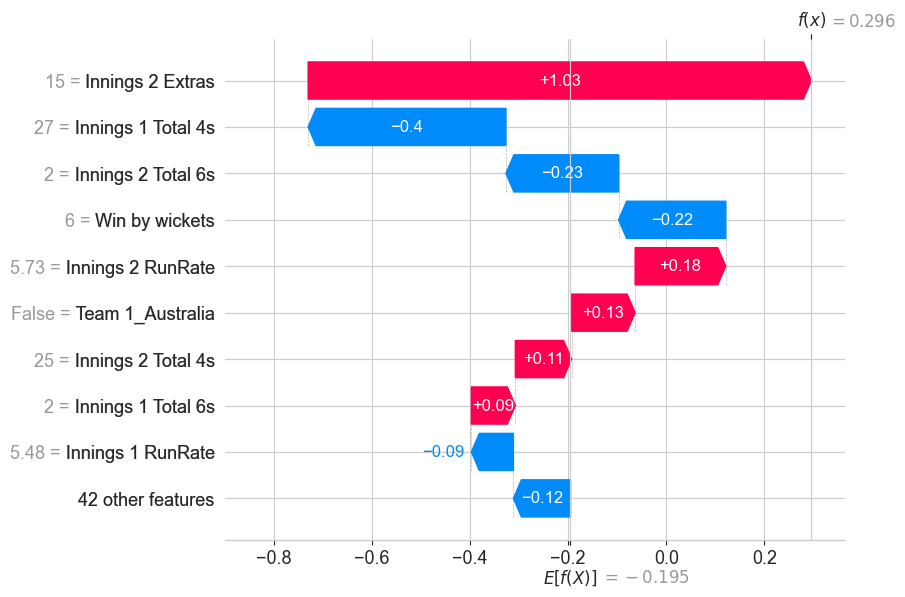

In [56]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
print("Shapley Waterfall plot for Before rule change:")
shap.plots.waterfall(B_xg_exp[154])

In [57]:
print("\nTaking a look at the SHAP values for Match After Rule Change")
print("Shapley Force plot for After rule change:")
shap.initjs()
shap.force_plot(A_xg_Bst_explainer.expected_value, A_xg_shap_values[73], A_x_test.iloc[73])


Taking a look at the SHAP values for Match After Rule Change
Shapley Force plot for After rule change:


Shapley Waterfall plot for After rule change:


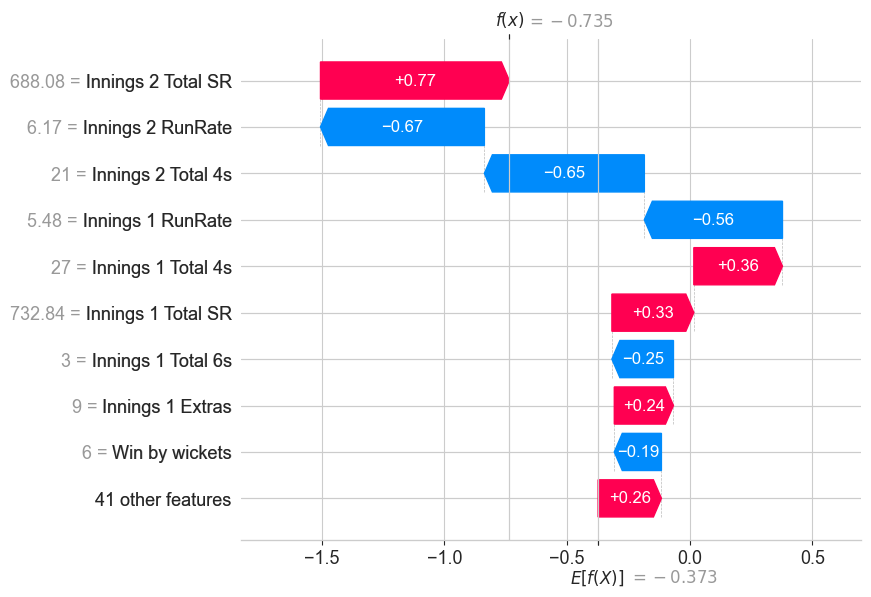

In [58]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
print("Shapley Waterfall plot for After rule change:")
shap.plots.waterfall(A_xg_exp[73])

#### Taking a further look at the summary plots generated by these models

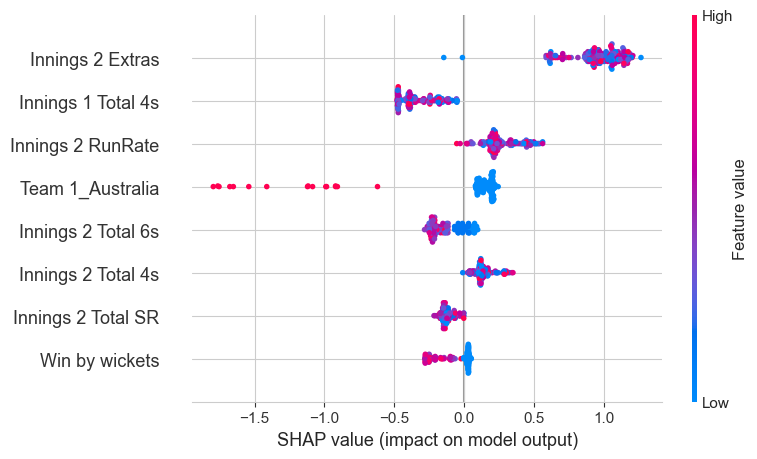

In [59]:
#Before Rule Change
shap.summary_plot(B_xg_shap_values, B_x_test,max_display=8)

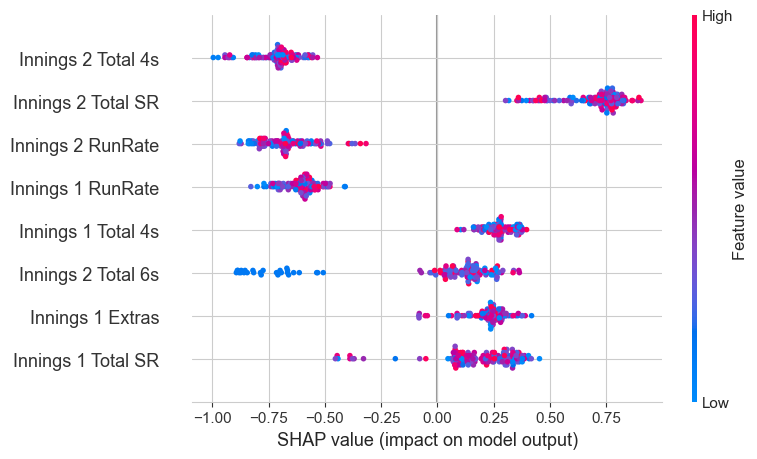

In [60]:
#After Rule Change
# A_all_shap_values = A_xg_Bst_explainer.shap_values(A_x_test)
shap.summary_plot(A_xg_shap_values, A_x_test,max_display=8)

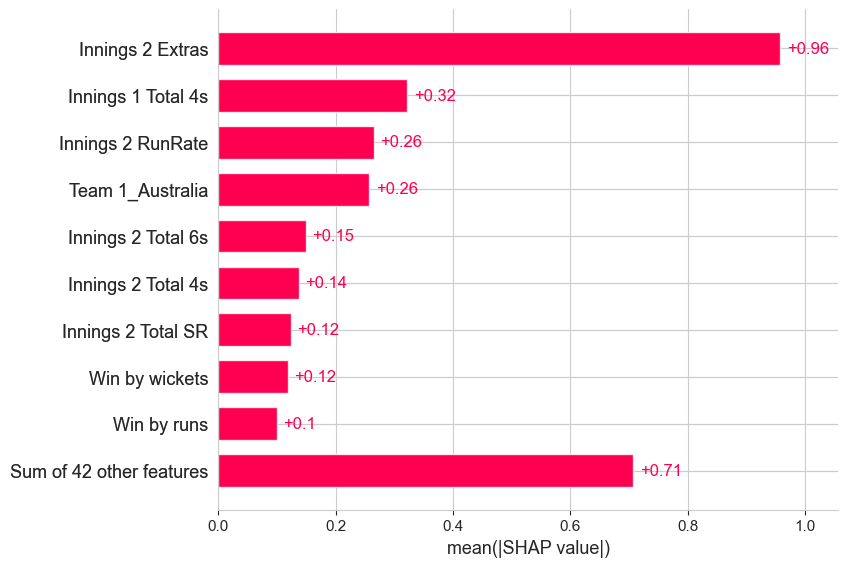

In [103]:
#Before Rule Change
shap.plots.bar(B_xg_exp)

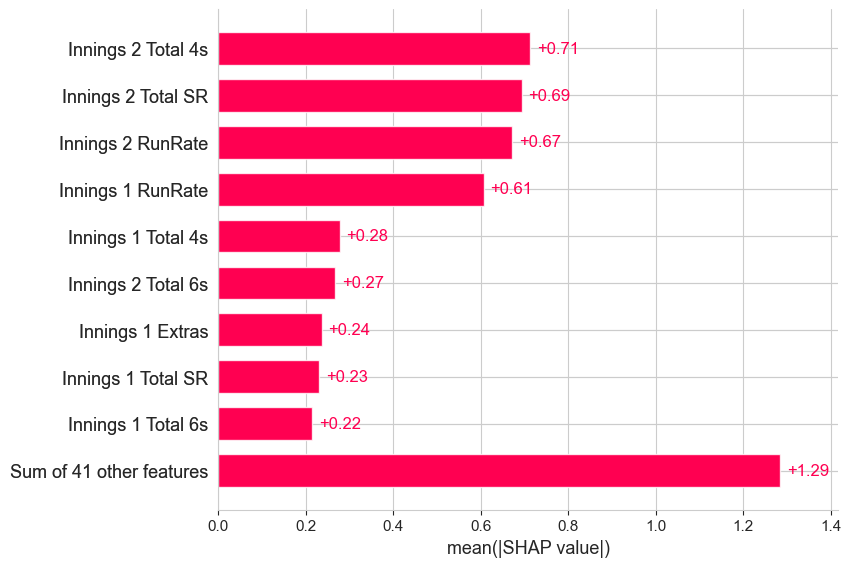

In [104]:
#Before Rule Change
shap.plots.bar(A_xg_exp)

### Explainers for Random Forest

In [193]:

import shap
import matplotlib.pyplot as pl

shap.initjs()
# Create Tree Explainer object that can calculate shap values
B_rf_explainer = shap.TreeExplainer(B_fin_rf_model)
A_rf_explainer = shap.TreeExplainer(A_fin_rf_model)

# #Calculating shap values
# B_shap_values = B_rf_explainer.shap_values(B_x_test.values)
# A_shap_values = A_rf_explainer.shap_values(A_x_test.values)

B_expected = B_rf_explainer.expected_value
A_expected = A_rf_explainer.expected_value


# Information needed for Force plot
B_rf_shap_values = B_rf_explainer.shap_values(B_x_test.values)[1]
A_rf_shap_values = A_rf_explainer.shap_values(A_x_test.values)[1]



# Information needed for Waterfall plot
B_rf_sv = B_rf_explainer(B_x_test)
B_rf_exp = Explanation(B_rf_sv.values, 
                  B_rf_sv.base_values, 
                  data=B_x_test.values, 
                  feature_names=B_x_test.columns)
A_rf_sv = A_rf_explainer(A_x_test)
A_rf_exp = Explanation(A_rf_sv.values, 
                  A_rf_sv.base_values, 
                  data=A_x_test.values, 
                  feature_names=A_x_test.columns)




In [195]:

print("The Match in Focus :\n")
print("Match before the Rule change")
display(clean_Total_06_11.iloc[[424]])
print("-----------------------------")
print(f'\n Actual Winner : {B_y_test.values[49]}')
print("-----------------------------")
print(f'\n Model Predicted Winner : {B_y_pred[49]}')

print("\nMatch after the Rule change")
display(clean_Total_12_17.iloc[[294]])
print("-----------------------------")
print(f'\n Actual Winner : {B_y_test.values[73]}')
print("-----------------------------")
print(f'\n Model Predicted Winner : {A_y_pred[73]}')


The Match in Focus :

Match before the Rule change


,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
424,Sri Lanka,India,Sri Lanka,"Aug 29, 2008","R Premadasa Stadium, Colombo",Sri Lanka,bat,Nuwan Kulasekara,Billy DoctroveTyron Wijewardene,4.54,...,470.96,13,12.0,1.0,724.22,7,112,0,0,0


-----------------------------

 Actual Winner : 0
-----------------------------

 Model Predicted Winner : 0

Match after the Rule change


,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
294,India,Sri Lanka,India,"Nov 6, 2014","Sardar Patel Stadium, Motera, Ahmedabad",Sri Lanka,bat,Ambati Rayudu,Bruce OxenfordVineet Kulkarni,5.48,...,732.84,9,21.0,8.0,688.08,3,0,6,0,1


-----------------------------

 Actual Winner : 0
-----------------------------

 Model Predicted Winner : 0


In [212]:
print("Taking a look at the SHAP values for Match Before Rule Change")
print("Shapley Force plot for Before rule change:")
shap.initjs()
shap.force_plot(B_rf_explainer.expected_value[1], B_rf_shap_values[49], B_x_test.iloc[49])

Taking a look at the SHAP values for Match Before Rule Change
Shapley Force plot for Before rule change:


In [210]:
print("Taking a look at the SHAP values for Match After Rule Change")
print("Shapley Force plot for After rule change:")
shap.initjs()
shap.force_plot(A_rf_explainer.expected_value[1], A_rf_shap_values[73], A_x_test.iloc[73])

Taking a look at the SHAP values for Match After Rule Change
Shapley Force plot for After rule change:


In [134]:
# #Looking at 2011 match 
# print("The 2011 match Before the rule change")
# display(clean_Total_06_11_subset.iloc[[49]])
# print("-----------------------------")
# print(f'\n Model Predicted Winner : {B_xg_boost_test_acc[1][49]}')
# print("\n--------**************----------\n")
# print("The 2012 match After the rule change")
# display(clean_Total_12_17_subset.iloc[[90]])
# print("-----------------------------")
# print(f'\n Model Predicted Winner : {A_xg_boost_test_acc[1][90]}')


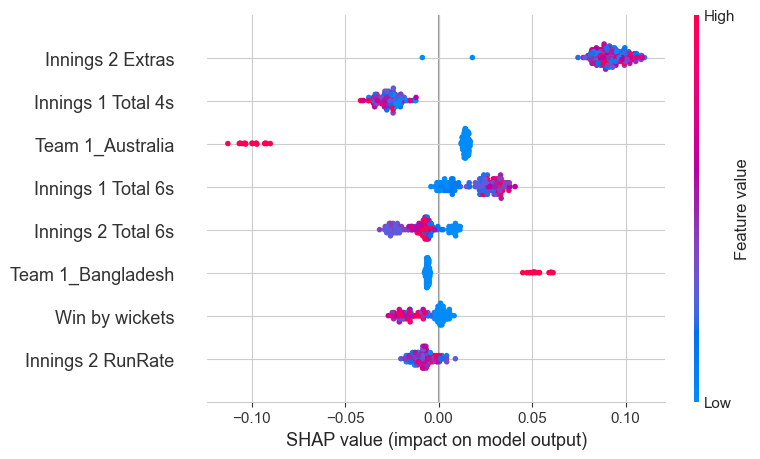

In [198]:
#Before Rule Change
shap.summary_plot(B_rf_shap_values, B_x_test,max_display=8)

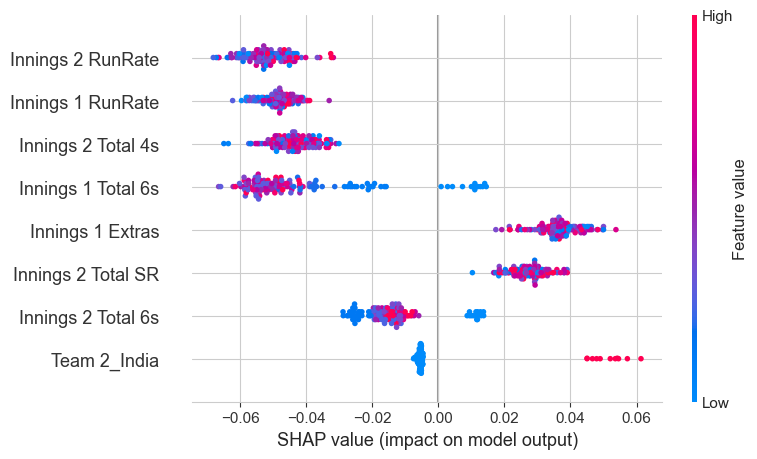

In [200]:
#After Rule Change
shap.summary_plot(A_rf_shap_values, A_x_test,max_display=8)

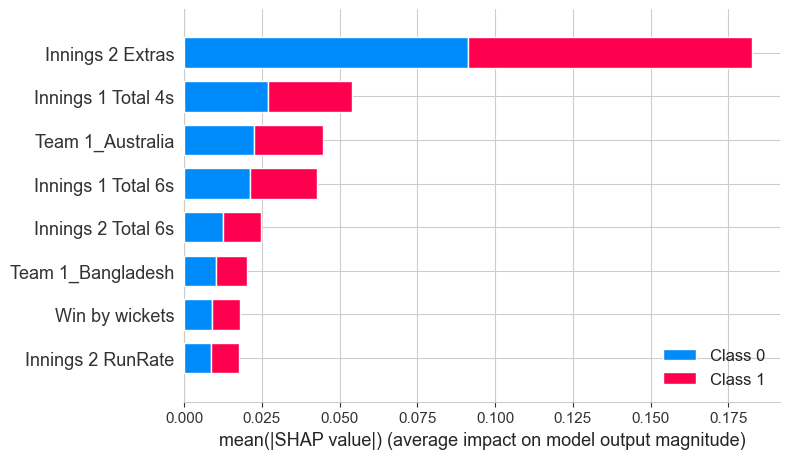

In [199]:
shap.summary_plot(B_shap_values, B_x_test,max_display=8)

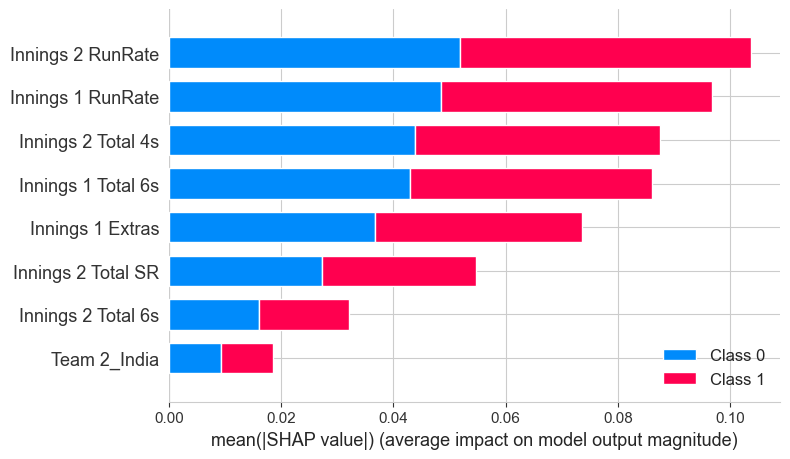

In [122]:
shap.summary_plot(A_shap_values, A_x_test,max_display=8)

In [68]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "Before Rule Change": [0.6988636363636364, 0.6079545454545454],
    "After Rule Change": [0.6086956521739131, 0.6159420289855072]
})

# Print the DataFrame
df

,Model,Before Rule Change,After Rule Change
0,Random Forest,0.698864,0.608696
1,XGBoost,0.607955,0.615942


### Lets compare the 2011 match with the 2012 match to see what changed

In [69]:
#Looking at 2011 match 
print("The 2011 match Before the rule change")
display(clean_Total_06_11_subset.iloc[[49]])
print("-----------------------------")
print(f'\n Model Predicted Winner : {B_train_acc[1][49]}')
print("\n--------**************----------\n")
print("The 2012 match After the rule change")
display(clean_Total_12_17_subset.iloc[[90]])
print("-----------------------------")
print(f'\n Model Predicted Winner : {A_train_acc[1][90]}')

The 2011 match Before the rule change


,Team 1,Team 2,Winner,Match Date,Stadium,Toss Winner,Toss Decision,Man Of Match,Umpires,Innings 1 RunRate,...,Innings 1 Total SR,Innings 1 Extras,Innings 2 Total 4s,Innings 2 Total 6s,Innings 2 Total SR,Innings 2 Extras,Win by runs,Win by wickets,Winning_team,TW
424,Sri Lanka,India,Sri Lanka,"Aug 29, 2008","R Premadasa Stadium, Colombo",Sri Lanka,bat,Nuwan Kulasekara,Billy DoctroveTyron Wijewardene,4.54,...,470.96,13,12.0,1.0,724.22,7,112,0,0,0


-----------------------------


NameError: name 'B_train_acc' is not defined

In [ ]:
#Before Rule change
# Calculate Shap values
choosen_instance = B_x_test.iloc[[61]] 
shap_values = B_rf_explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(B_rf_explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
#After Rule change
# Get the row indices of the B_x_test DataFrame
A_x_test_indices = A_x_test.index

# Fetch the same indices from the clean_Total_06_11 DataFrame
clean_Total_12_17_subset = clean_Total_12_17.iloc[A_x_test_indices]
clean_Total_12_17_subset.head()

In [ ]:
ls_b_test = ls_text_incices(clean_Total_12_17_subset)
ls_b_test

In [ ]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
display(clean_Total_12_17_subset.iloc[[75]])
print("-----------------------------")
print(f'\n Model Predicted Winner : {A_train_acc[1][75]}')

In [ ]:
#After Rule change
# Calculate Shap values
choosen_instance = A_x_test.iloc[[75]] 
shap_values = A_rf_explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(A_rf_explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
display(clean_Total_12_17_subset.iloc[[123]])
print("-----------------------------")
print(f'\n Model Predicted Winner : {A_train_acc[1][123]}')

In [ ]:
#After Rule change
# Calculate Shap values
choosen_instance = A_x_test.iloc[[123]] 
shap_values = A_rf_explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(A_rf_explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
# #TEMP ++++++++++++++++++++++++++++++++
# from sklearn.metrics import accuracy_score 
# # Evaluate the model on the validation set
# def evaluate_model(model, val_data):
#     preds = model.predict(val_data)
#     preds = [round(i) for i in preds]
#     acc_sc = accuracy_score(val_data.get_label(), preds)
#     return (acc_sc,preds)   
# #Tuning grid for parameters
# def tune_xgBoost(train_data,test_data):
#     tst_params = {
#         'max_depth': [10, 20, 30,40,50],
#         'learning_rate': [0.01, 0.05, 0.1,0.001],
#         'min_child_weight': range(1,5)
#         # 'class_weight': ['balanced', 'balanced_subsample']
#     }
#     train_stats = []
#     for mx_dept in tst_params['max_depth']:
#         for lr_rt in tst_params['learning_rate']:
#             for m_wt in tst_params['min_child_weight']:
                
#                 model_params = {
#                         "eta": lr_rt,
#                         "max_depth": mx_dept,
#                         # "objective": "multi:softmax",
#                         "objective": "binary:logistic",
#                         "learning_rate" :lr_rt,
#                         "eval_metric": "logloss",
#                         "base_score": np.mean(test_data.get_label()),
#                         "min_child_weight": m_wt,
#                         "seed":42
#                     }
#                 # Train the model
#                 model = xgb.train(model_params, train_data, verbose_eval=25)
#                 # Evaluate the model on the validation set
#                 train_acc = evaluate_model(model, test_data)[0]
#                 train_stat = {"Train_Acc" :train_acc,"max_depth": mx_dept,"learning_rate":lr_rt,"min_child_weight":m_wt}
#                 # print(train_stat)
#                 train_stats.append(train_stat)
#     #Sorting and showing the best hyperparameter setting
#     srtd_train_stats = sorted(train_stats, key=lambda d: d['Train_Acc'], reverse=True)
#     # print(f'Best hyper parameter values found {srtd_train_stats[0]}')
#     return(srtd_train_stats[0])
# B_params = tune_xgBoost(B_xg_train,B_xg_val)
# A_params = tune_xgBoost(A_xg_train,A_xg_val)
# print(f'Best hyper parameters for Before Rule change data:\n{B_params}\n')
# print(f'Best hyper parameters for After Rule change data:\n{A_params}')


In [203]:
import random

random.seed(10)
# print(random.random())